# Analiza cen akcji firm Mastercard, Visa oraz American Express (2010–2024)


## Cel projektu

Celem projektu jest analiza historycznych cen akcji firm **Mastercard**, **Visa** oraz **American Express** w latach **2010–2024** oraz zbadanie zależności pomiędzy ceną akcji a wolumenem obrotu. Na podstawie uzyskanych wyników zostanie przeprowadzona prognoza przyszłych cen akcji oraz ich porównanie.


## Pytania badawcze

- Jak zmieniała się cena akcji analizowanych firm w latach 2010–2024?
- Czy ceny akcji Mastercard, Visa oraz American Express są ze sobą skorelowane?
- Czy wolumen obrotu wpływa na cenę akcji, czy też cena akcji wpływa na wolumen?

Na tej podstawie zamierzam przeprowadzić prognozę dla cen akcji tych trzech firm oraz przeporwadzić wyniki.

## Założenia:

- Firmy te będą regować w podobny sposób na kryzysy w latach 2010-2024, a wartość akcji będzie proporcjonalna w stosunku do firmy konkurnecyjnej. 
- Większa firma wpływa na mniejsze 
- Zmniejszenie liczby kupna wlumenów w trakcie kryzysu

## Uzasadnienie 
- Zagadnienie ma charakter uniwersalny – mechanizmy rynku akcji są podobne niezależnie od analizowanej spółki.
- Mastercard, Visa oraz American Express to międzynarodowe korporacje silnie powiązane z gospodarką USA.
- Okres pandemii COVID-19 mógł wpłynąć na ceny akcji tych firm w sposób odmienny niż w przypadku wielu innych sektorów.
- Mastercard i Visa są powszechnie używane również w Polsce, co czyni analizę bardziej praktyczną i zrozumiałą.


## Przygotowanie Projektu

### Wczytywanie bibliotek 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
import itertools # itertools dla generowania kombinacji parametrów

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import keras 
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

### Ładowanie danych

In [3]:
df = pd.read_csv('MVR.csv')
df_2 = pd.read_csv('AXP_stock_data.csv')

## Statystyka opisowa 

### Visa i Mastercard

In [4]:
print(df.info())
print(df.describe().T)
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   str    
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), str(1)
memory usage: 411.2 KB
None
              count          mean           std           min           25%  \
Open_M       4047.0  1.645356e+02  1.386205e+02  1.210000e+01  4.245950e+01   
High_M       4047.0  1.661701e+02  1.399460e+02  1

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


### American Express

In [5]:
print(df_2.info())
print(df_2.describe().T)
df_2.head()

<class 'pandas.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4012 non-null   str    
 1   Open               4012 non-null   float64
 2   High               4012 non-null   float64
 3   Low                4012 non-null   float64
 4   Close              4012 non-null   float64
 5   Volume             4012 non-null   int64  
 6   Dividends          4012 non-null   float64
 7   Stock Splits       4012 non-null   float64
 8   Daily_Return       4011 non-null   float64
 9   Cumulative_Return  4011 non-null   float64
 10  MA_50              3963 non-null   float64
 11  MA_200             3813 non-null   float64
dtypes: float64(10), int64(1), str(1)
memory usage: 376.3 KB
None
                    count          mean           std            min  \
Open               4012.0  1.094256e+02  7.443519e+01      29.780785   
High               401

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-04 00:00:00-05:00,32.467961,32.698679,32.133812,32.555473,6894300,0.00,0.0,NaN,NaN,NaN,NaN
1,2010-01-05 00:00:00-05:00,32.483875,32.802109,32.117902,32.483875,10641200,0.00,0.0,-0.002199,-0.002199,NaN,NaN
2,2010-01-06 00:00:00-05:00,32.802106,33.152164,32.754370,33.008961,8399400,0.00,0.0,0.016164,0.013930,NaN,NaN
3,2010-01-07 00:00:00-05:00,32.969006,33.752083,32.849150,33.544327,8981700,0.18,0.0,0.016219,0.030374,NaN,NaN
4,2010-01-08 00:00:00-05:00,33.368525,33.943846,33.080868,33.520348,7907700,0.00,0.0,-0.000715,0.029638,NaN,NaN


## Data Processing

### Zamiana Daty na format datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df_2['Date'] = pd.to_datetime(df_2['Date'], utc=True).dt.tz_localize(None).dt.normalize()

In [7]:
df_2['Date'].info()

<class 'pandas.Series'>
RangeIndex: 4012 entries, 0 to 4011
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
4012 non-null   datetime64[us]
dtypes: datetime64[us](1)
memory usage: 31.5 KB


### Usuwanie wartości NA - nie trzeba

In [8]:
print(df.isna().sum())
print(df_2.isna().sum())

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Dividends              0
Stock Splits           0
Daily_Return           1
Cumulative_Return      1
MA_50                 49
MA_200               199
dtype: int64


### Połączenie Datasetów na podstawie kolumny 'Date':

In [9]:
#Połączenie Datasetów na podstawie kolumny 'Date':
merged_df = pd.merge(df, df_2, on='Date', how='inner')
print(merged_df.info())
merged_df.head()

<class 'pandas.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3646 non-null   datetime64[us]
 1   Open_M             3646 non-null   float64       
 2   High_M             3646 non-null   float64       
 3   Low_M              3646 non-null   float64       
 4   Close_M            3646 non-null   float64       
 5   Adj Close_M        3646 non-null   float64       
 6   Volume_M           3646 non-null   int64         
 7   Open_V             3646 non-null   float64       
 8   High_V             3646 non-null   float64       
 9   Low_V              3646 non-null   float64       
 10  Close_V            3646 non-null   float64       
 11  Adj Close_V        3646 non-null   float64       
 12  Volume_V           3646 non-null   int64         
 13  Open               3646 non-null   float64       
 14  High               

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,...,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-04,25.799000,25.820000,25.607,25.684000,23.820490,9321000,22.000000,22.192499,21.865000,...,32.698679,32.133812,32.555473,6894300,0.00,0.0,NaN,NaN,NaN,NaN
1,2010-01-05,25.784000,25.796000,25.305,25.608000,23.749996,12906000,21.825001,21.882500,21.500000,...,32.802109,32.117902,32.483875,10641200,0.00,0.0,-0.002199,-0.002199,NaN,NaN
2,2010-01-06,25.624001,25.624001,25.250,25.556000,23.715660,10785000,21.752501,21.770000,21.475000,...,33.152164,32.754370,33.008961,8399400,0.00,0.0,0.016164,0.013930,NaN,NaN
3,2010-01-07,25.340000,25.406000,25.098,25.389000,23.560688,11273000,21.492500,21.750000,21.387501,...,33.752083,32.849150,33.544327,8981700,0.18,0.0,0.016219,0.030374,NaN,NaN
4,2010-01-08,25.233000,25.492001,25.170,25.398001,23.569046,8635000,21.705000,21.847500,21.557501,...,33.943846,33.080868,33.520348,7907700,0.00,0.0,-0.000715,0.029638,NaN,NaN


### Zmiana nazewnictwa kolumn

In [10]:
merged_df.rename(columns={'Open':'Open_AE', 'High':'High_AE', 'Low':'Low_AE', 'Close':'Close_AE', 'Adj Close':'Adj_Close_AE', 'Volume':'Volume_AE'}, inplace=True)
merged_df.columns

Index(['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Adj Close_M',
       'Volume_M', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Adj Close_V',
       'Volume_V', 'Open_AE', 'High_AE', 'Low_AE', 'Close_AE', 'Volume_AE',
       'Dividends', 'Stock Splits', 'Daily_Return', 'Cumulative_Return',
       'MA_50', 'MA_200'],
      dtype='str')

### Stworzenie Datasetu miesięcznego 

In [11]:
df_monthly = merged_df.set_index('Date').resample('ME').last().reset_index()
df_monthly.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,...,High_AE,Low_AE,Close_AE,Volume_AE,Dividends,Stock Splits,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2010-01-31,25.115999,25.514000,24.909000,24.990000,23.190432,15042000,20.650000,21.245001,20.467501,...,30.979355,29.852688,30.092403,14219900,0.0,0.0,0.006145,-0.075658,NaN,NaN
1,2010-02-28,22.298000,22.514000,22.106001,22.437000,20.821272,10947000,21.395000,21.430000,21.254999,...,30.619787,30.172315,30.515909,6475500,0.0,0.0,0.003943,-0.062649,NaN,NaN
2,2010-03-31,25.219999,25.427999,25.142000,25.400000,23.570902,9333000,22.674999,23.049999,22.629999,...,33.385568,32.767617,33.112705,6882700,0.0,0.0,-0.000727,0.017116,31.476368,NaN
3,2010-04-30,25.721001,25.740000,24.599001,24.804001,23.031168,16675000,23.320000,23.342501,22.504999,...,38.545878,36.756219,37.013031,14019700,0.0,0.0,-0.031092,0.136922,33.776104,NaN
4,2010-05-31,20.737000,20.823999,20.115000,20.177000,18.734877,25471000,18.342501,18.375000,18.000000,...,32.671299,31.740356,31.997168,12494000,0.0,0.0,-0.011406,-0.017149,34.514117,NaN


### Dataset dla close 

In [12]:
df_close = df_monthly[['Date', 'Close_M', 'Close_V', 'Close_AE']].copy()
df_close.head()

,Date,Close_M,Close_V,Close_AE
0,2010-01-31,24.990000,20.507500,30.092403
1,2010-02-28,22.437000,21.320000,30.515909
2,2010-03-31,25.400000,22.757500,33.112705
3,2010-04-30,24.804001,22.557501,37.013031
4,2010-05-31,20.177000,18.115000,31.997168


### Dataset dla volume

In [13]:
df_volume = df_monthly[['Date', 'Volume_M', 'Volume_V', 'Volume_AE']].copy()
df_volume.head()

,Date,Volume_M,Volume_V,Volume_AE
0,2010-01-31,15042000,20281600,14219900
1,2010-02-28,10947000,12476400,6475500
2,2010-03-31,9333000,12504400,6882700
3,2010-04-30,16675000,25059600,14019700
4,2010-05-31,25471000,26581200,12494000


### Wyłączenie trzech datasetów 

Dla każdej z firm - ułatwi to dalszą analizę EDA i operacje na każdej z firm. Doda to więcej kroków do analizy (>3x), ale zagwarantuje rozdzielność danych

In [14]:
#Mastercard 
df_m = df_monthly[['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Volume_M']].copy()
#Visa
df_v = df_monthly[['Date', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Volume_V']].copy()
#American Express
df_ae = df_monthly[['Date', 'Open_AE', 'High_AE', 'Low_AE', 'Close_AE', 'Volume_AE']].copy()

### Standaryzacja wartości kupionych volumenów -  dla późniejszego modelu predykcji.

In [15]:
df_m['Volume_M_log'] = np.log1p(df_m['Volume_M'])  # log(1 + x) żeby uniknąć log(0)
df_v['Volume_V_log'] = np.log1p(df_v['Volume_V'])
df_ae['Volume_AE_log'] = np.log1p(df_ae['Volume_AE'])


In [16]:
df_m .head()

,Date,Open_M,High_M,Low_M,Close_M,Volume_M,Volume_M_log
0,2010-01-31,25.115999,25.514000,24.909000,24.990000,15042000,16.526357
1,2010-02-28,22.298000,22.514000,22.106001,22.437000,10947000,16.208576
2,2010-03-31,25.219999,25.427999,25.142000,25.400000,9333000,16.049067
3,2010-04-30,25.721001,25.740000,24.599001,24.804001,16675000,16.629421
4,2010-05-31,20.737000,20.823999,20.115000,20.177000,25471000,17.053051


### Sumowanie danych dla każdego miesiąca.

 Poprawi to przejżystość danych, przy jednoczesnym zachowaniu poprawności danych

In [17]:
print('Mastercard monthly data:')
print(df_m.head())
print('Visa monthly data:')
print(df_v.head())
print('American Express monthly data:')
print(df_ae.head())

Mastercard monthly data:
        Date     Open_M     High_M      Low_M    Close_M  Volume_M  \
0 2010-01-31  25.115999  25.514000  24.909000  24.990000  15042000   
1 2010-02-28  22.298000  22.514000  22.106001  22.437000  10947000   
2 2010-03-31  25.219999  25.427999  25.142000  25.400000   9333000   
3 2010-04-30  25.721001  25.740000  24.599001  24.804001  16675000   
4 2010-05-31  20.737000  20.823999  20.115000  20.177000  25471000   

   Volume_M_log  
0     16.526357  
1     16.208576  
2     16.049067  
3     16.629421  
4     17.053051  
Visa monthly data:
        Date     Open_V     High_V      Low_V    Close_V  Volume_V  \
0 2010-01-31  20.650000  21.245001  20.467501  20.507500  20281600   
1 2010-02-28  21.395000  21.430000  21.254999  21.320000  12476400   
2 2010-03-31  22.674999  23.049999  22.629999  22.757500  12504400   
3 2010-04-30  23.320000  23.342501  22.504999  22.557501  25059600   
4 2010-05-31  18.342501  18.375000  18.000000  18.115000  26581200   

   Vol

## EDA

### Porównanie cen akcji wszytskich firm

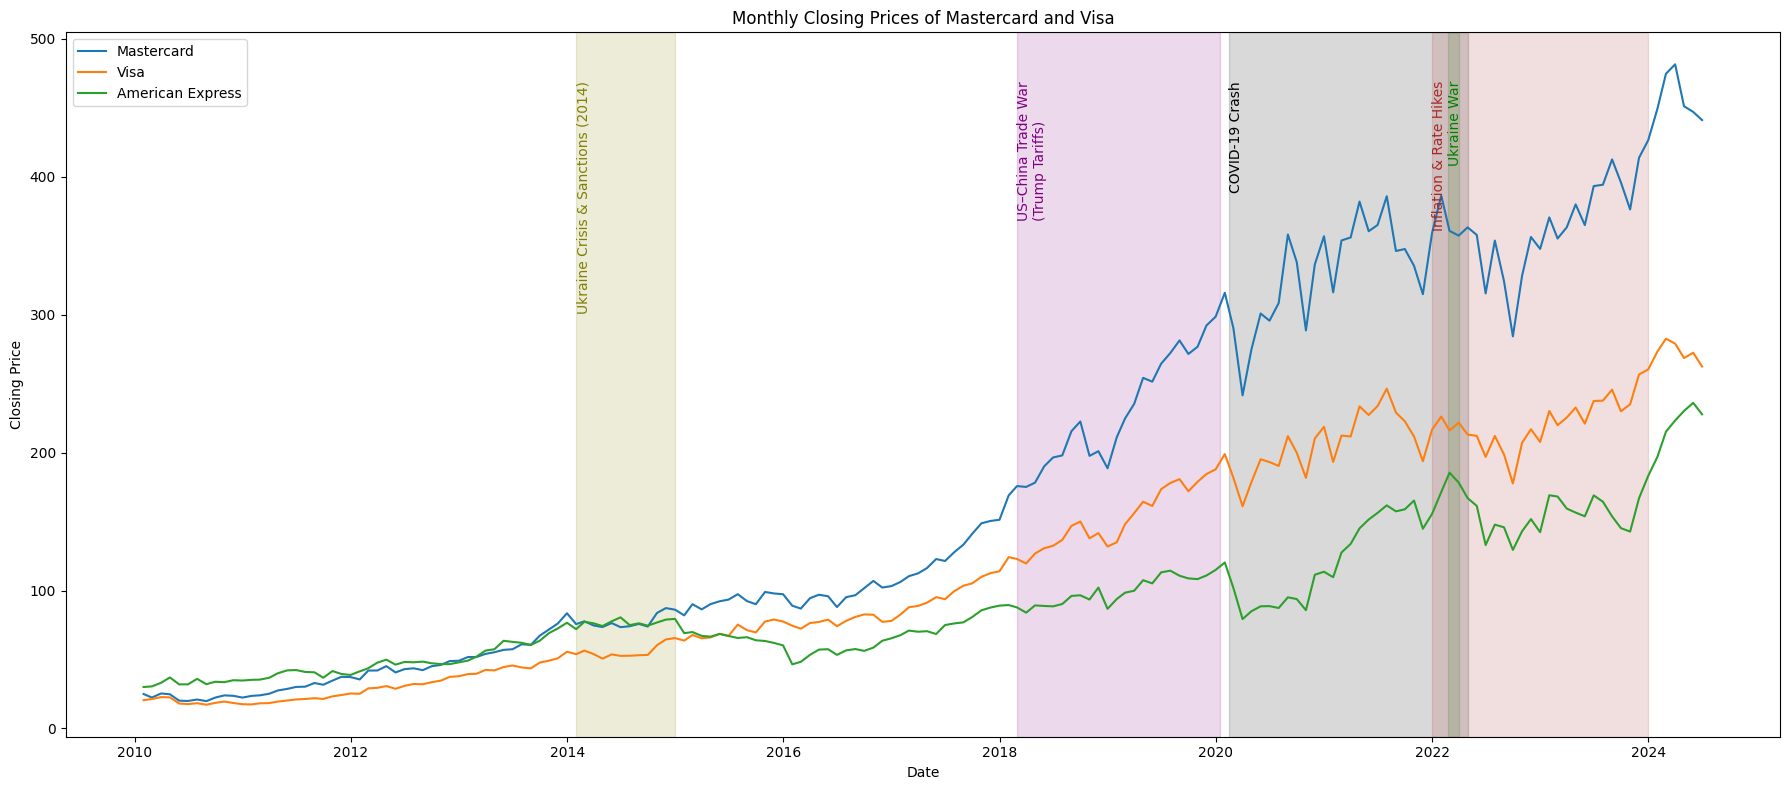

In [18]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Mastercard and Visa and American Express
ax1.plot(df_m['Date'], df_m['Close_M'], label='Mastercard')
ax1.plot(df_v['Date'], df_v['Close_V'], label='Visa')
ax1.plot(df_ae['Date'], df_ae['Close_AE'], label='American Express')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('Monthly Closing Prices of Mastercard and Visa')


event_periods = [
    ("2014-02-01", "2014-12-31", "Ukraine Crisis & Sanctions (2014)", "olive"),
    ("2018-03-01", "2020-01-15", "US–China Trade War\n(Trump Tariffs)", "purple"),
    ("2020-02-15", "2022-04-30", "COVID-19 Crash", "black"),
    ("2022-02-24", "2022-03-31", "Ukraine War", "green"),
    ("2022-01-01", "2023-12-31", "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(start_dt, end_dt, color=color, alpha=0.15)
    ax1.text(start_dt, ax1.get_ylim()[1]*0.93, label,
             rotation=90, verticalalignment='top',
             fontsize=10, color=color)

ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()


 Widać, że pierwsze przewidywania były poprawne. Mastercard, Visa oraz American Express mają proporcojonalne ceny akcji względem siebie, a ich cena waha sie podobnie w zalezności od czasu. Co naturlne u Mastercarda widac większe wahania cen niż u innych. Większe ceny = większe wahania. 

W perpsektywie lat 2008 - 2024 widać trend rosnący wszystkich trzech  firm z pewnymi fluktuacjami (Szczególnie po 2020 roku.)
W latch 2008- 2019 fluktuacje te były znacznie mniej widoczne u obu firm. Jest to zrozumiałe, ponieważ ceny akcji są wyższe, jednak muszą być równiez inne czynniki 

Można zauwazyć, że po zaraz po rozpoczęciu pandemi Covid-19 oraz problemu inflacyjnego w USA + rozpoczęcie wojny w Ukrainie, akcje mocno spadają, a następnie ponownie rosną pomimo dalej trwającego kryzysu. Podczas pandemiii można to argumentować chwilową paniką oraz zamrożeniem giełdy, a następnie wzrost ceny ze względu na znaczny rozwój płatności internetowych przy równoczesnym ograniczeniu gotówki

Poza trendem nie widać sezoowości, ceny akcji tych firm są raczej spowodowane pewnymi impulsami. Należy zrobić test IRF
Widać cykliczność - spadek i wzrost ceny / 
Biały szum -  nalezy zrobić test autokorelacji, ale raczej tak (charakterystyka giełdy)

Dane nie są stacjonarne

Do zrobienia:
    - Analiza IRF (opcjonalnie)
    - Zbadać autokorelacje
    - Matryca korelacji 

### Porównanie akcji Mastercard i kupionych volumnenów (suma miesięczna)

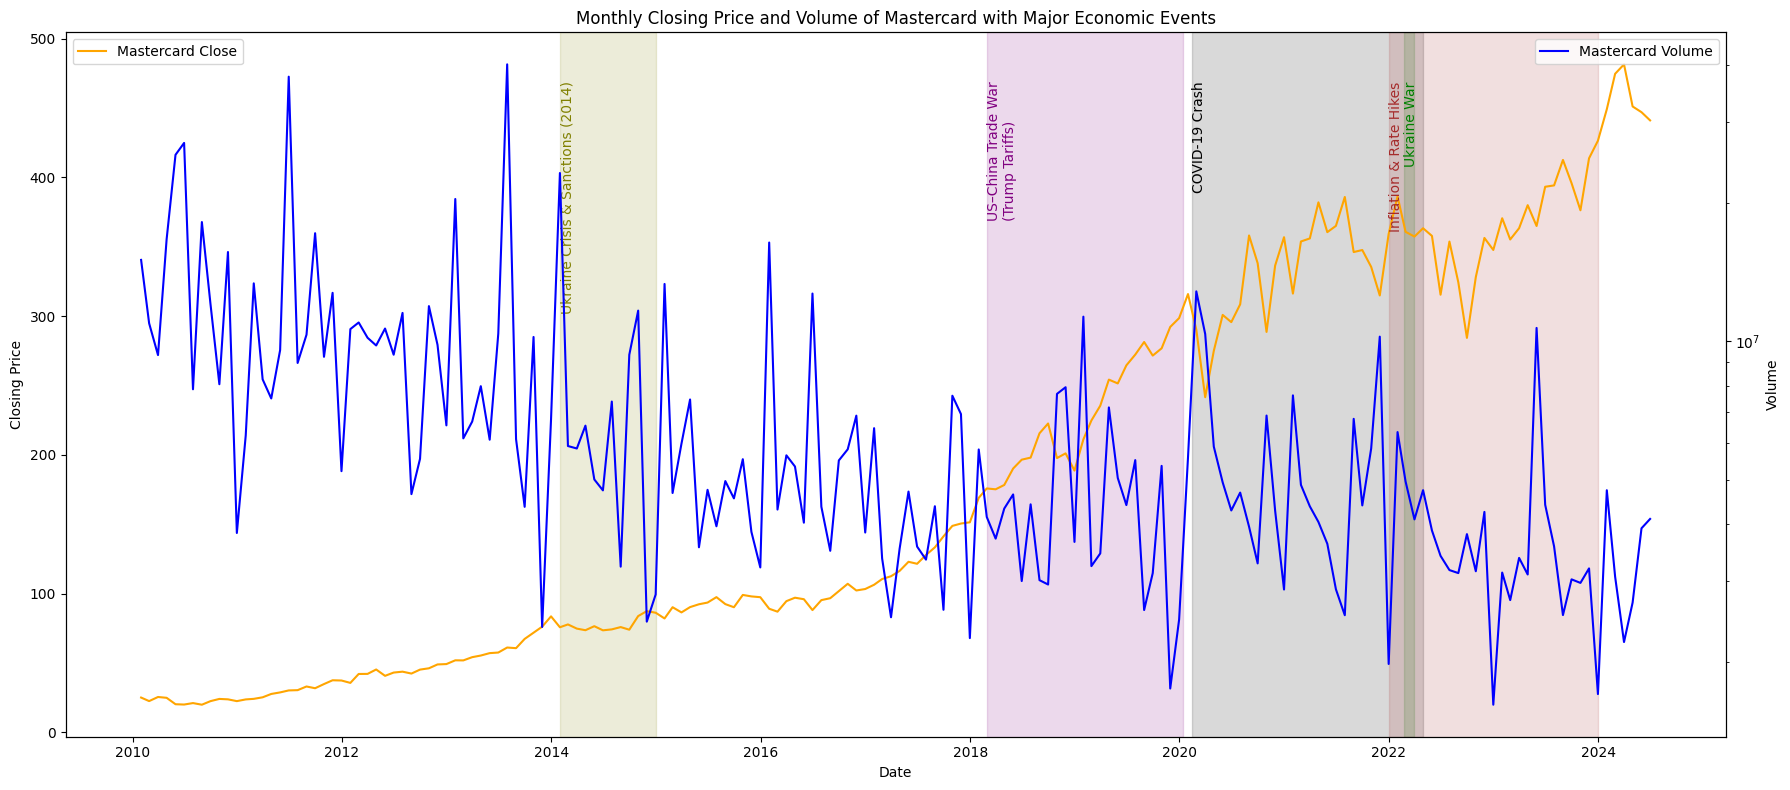

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_m['Date'],
    df_m['Close_M'],
    label='Mastercard Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')

ax2 = ax1.twinx()
ax2.plot(
    df_m['Date'],
    df_m['Volume_M'],
    label='Mastercard Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Mastercard with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Widac wyraźny sapdek ilości kupionych volumenów wraz z czasem - trend ujemny. Może to być spowodowane zainsteresowaniem kupujących - na rynku wraz z czasem na giełdzie pojawia się więcej firm z bardziej obiecującymi zyskami.
Widać również pewną zależność w kupowaniu wolumenów - wzrost oraz spadek bezpośrednio w kolejnych miesiącach. Widać jednak pewne zachowania możliwe, że spowodowane opisanymi na wykresie kryzysami. Na początku każdego kryzysu jest widoczny znaczny spadek ilości kupionych akcji. Po upływie paru miesięcy, kiedy cena akcji spadła, a sytuacja geopolityczna się unormowała widać ponowny popyt.

Czy istnieje korelacja albo przyczynowość - test Grangera

### Porównanie akcji Visa i kupionych volumnenów (suma miesięczna)

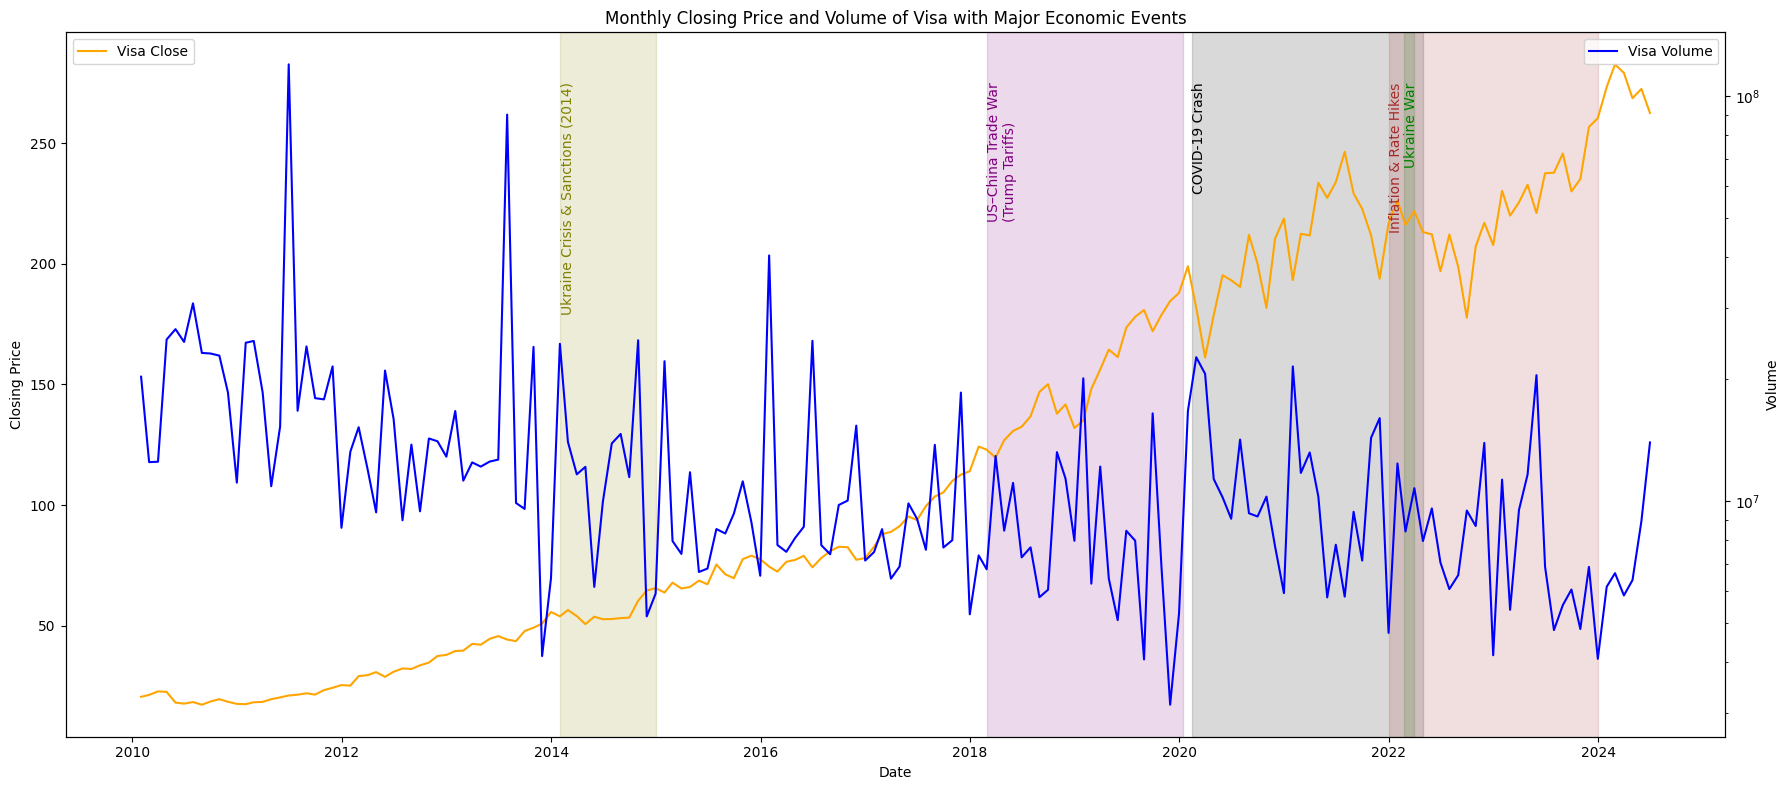

In [20]:
fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_v['Date'],
    df_v['Close_V'],
    label='Visa Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')


ax2 = ax1.twinx()
ax2.plot(
    df_v['Date'],
    df_v['Volume_V'],
    label='Visa Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Visa with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Te same wnioski co z poprzednim wykresem

### Porównanie akcji American Express i kupionych volumnenów (suma miesięczna)

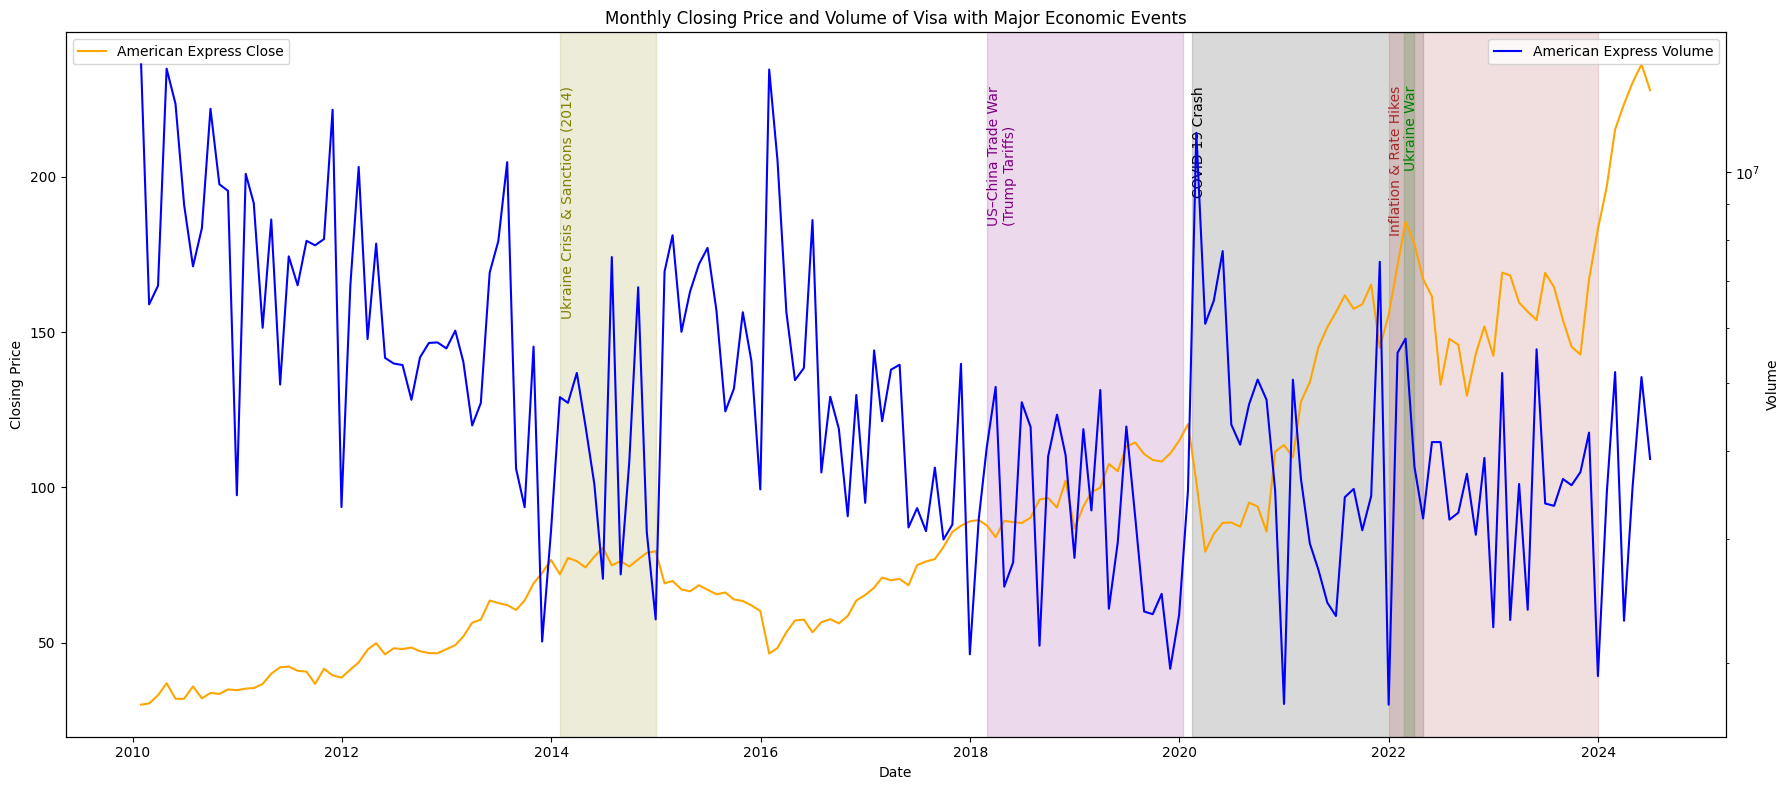

In [21]:
fig, ax1 = plt.subplots(figsize=(18, 8))


ax1.plot(
    df_ae['Date'],
    df_ae['Close_AE'],
    label='American Express Close',
    color='orange'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')


ax2 = ax1.twinx()
ax2.plot(
    df_ae['Date'],
    df_ae['Volume_AE'],
    label='American Express Volume',
    color='blue'
)
ax2.set_ylabel('Volume')
ax2.set_yscale('log')


event_periods = [
    
    # Ukraine crisis & sanctions (2014)
    ("2014-02-01", "2014-12-31",
     "Ukraine Crisis & Sanctions (2014)", "olive"),

    # US–China Trade War (Trump tariffs)
    ("2018-03-01", "2020-01-15",
     "US–China Trade War\n(Trump Tariffs)", "purple"),

    # COVID-19 crash
    ("2020-02-15", "2022-04-30",
     "COVID-19 Crash", "black"),

    # Ukraine war (2022)
    ("2022-02-24", "2022-03-31",
     "Ukraine War", "green"),

    # Inflation & rate hikes
    ("2022-01-01", "2023-12-31",
     "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(
        start_dt,
        end_dt,
        color=color,
        alpha=0.15
    )

    ax1.text(
        start_dt,
        ax1.get_ylim()[1] * 0.93,
        label,
        rotation=90,
        verticalalignment='top',
        fontsize=10,
        color=color
    )


ax1.set_title(
    'Monthly Closing Price and Volume of Visa with Major Economic Events'
)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Porównanie ilości sprzedancyh wolumenów dla wszystkich firm 

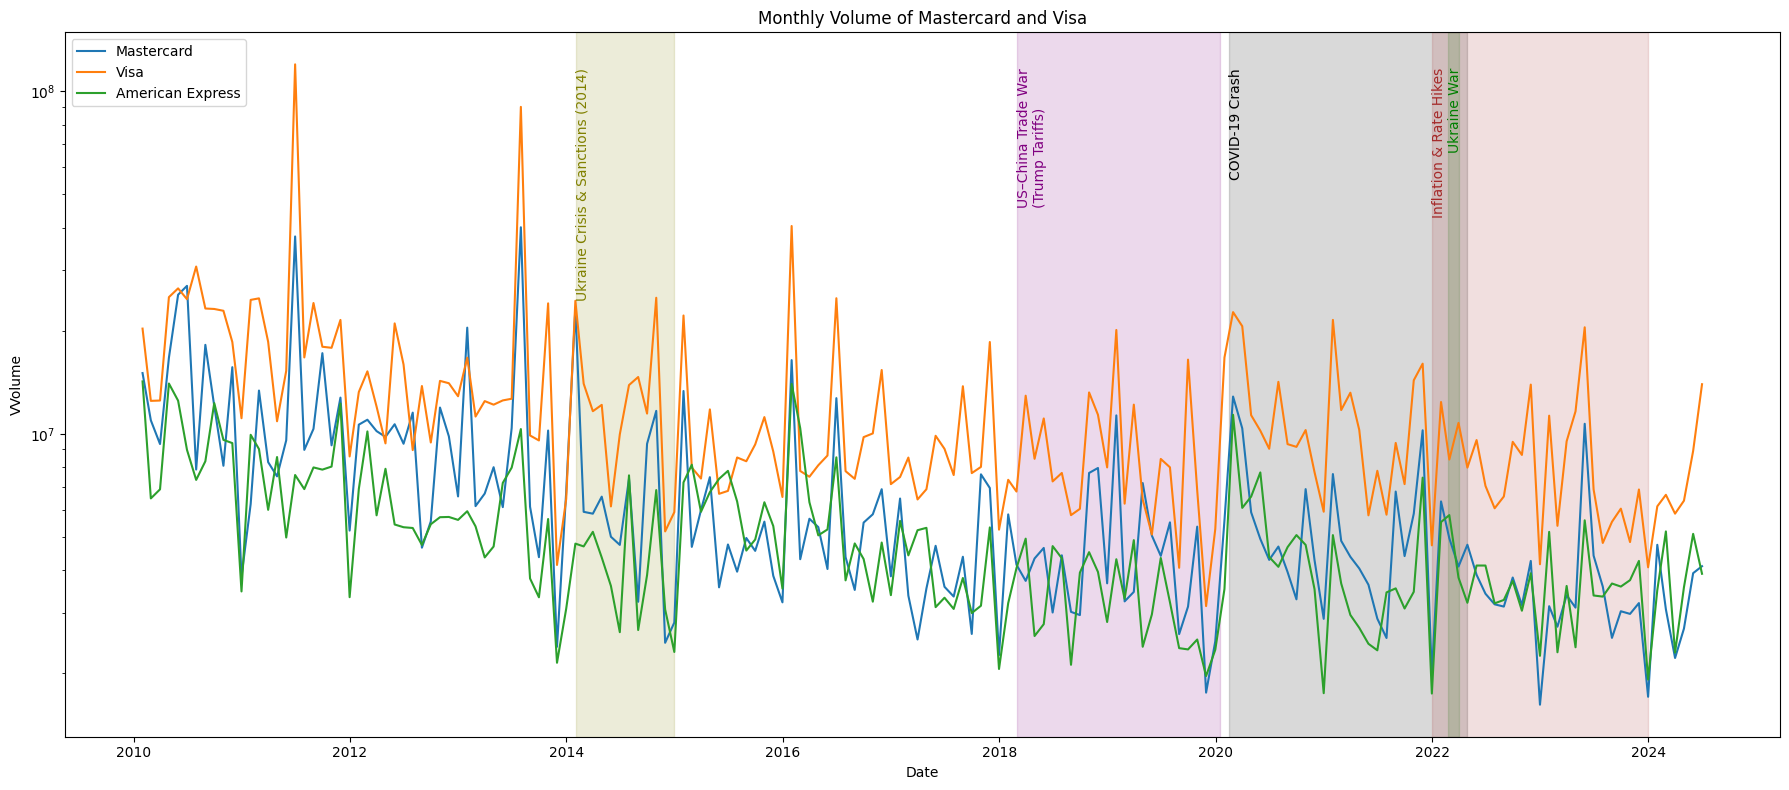

In [22]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Mastercard and Visa and American Express
ax1.plot(df_m['Date'], df_m['Volume_M'], label='Mastercard')
ax1.plot(df_v['Date'], df_v['Volume_V'], label='Visa')
ax1.plot(df_ae['Date'], df_ae['Volume_AE'], label='American Express')
ax1.set_xlabel('Date')
ax1.set_ylabel('VVolume')
ax1.set_title('Monthly Volume of Mastercard and Visa')


event_periods = [
    ("2014-02-01", "2014-12-31", "Ukraine Crisis & Sanctions (2014)", "olive"),
    ("2018-03-01", "2020-01-15", "US–China Trade War\n(Trump Tariffs)", "purple"),
    ("2020-02-15", "2022-04-30", "COVID-19 Crash", "black"),
    ("2022-02-24", "2022-03-31", "Ukraine War", "green"),
    ("2022-01-01", "2023-12-31", "Inflation & Rate Hikes", "brown"),
]

for start, end, label, color in event_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    ax1.axvspan(start_dt, end_dt, color=color, alpha=0.15)
    ax1.text(start_dt, ax1.get_ylim()[1]*0.93, label,
             rotation=90, verticalalignment='top',
             fontsize=10, color=color)

ax1.legend(loc='upper left')
ax1.set_yscale('log')
plt.tight_layout()
plt.show()


Liczba kupowanych akcji jest dosyć proporcjonalna dla trzech omawianych firm. Można wnioskować, że moga one pokazywać ogólne wahania sprzedaży akcji dla banków /firmtransakcyjnych

### Macierz korelacji

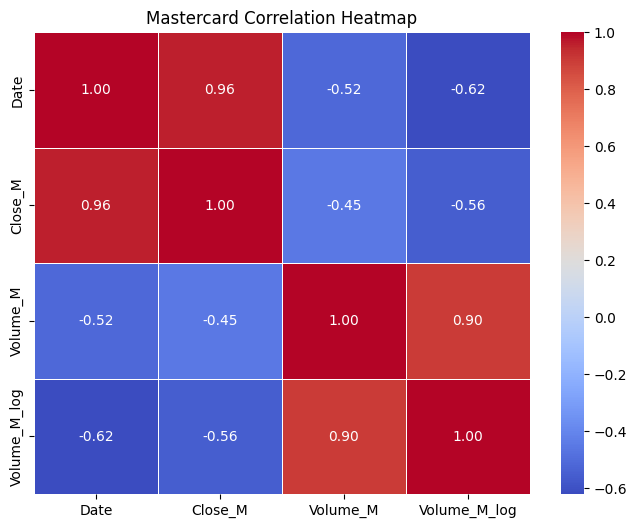

In [23]:
# Mastercard
matrix = df_m.drop(columns=['Open_M', 'Low_M','High_M']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mastercard Correlation Heatmap")
plt.show()

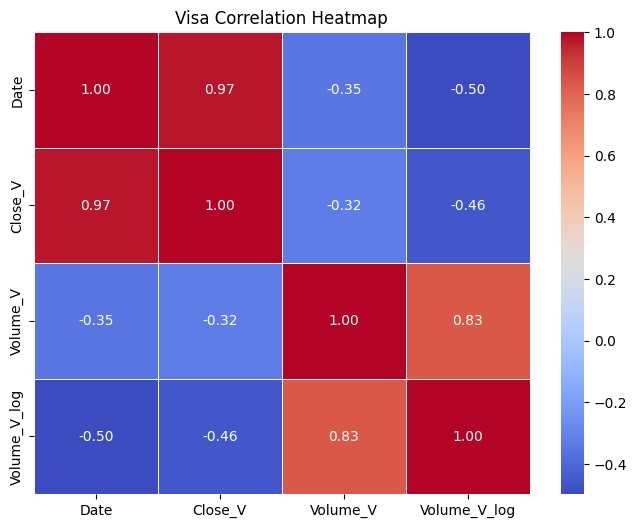

In [24]:
#Visa
matrix = df_v.drop(columns=['Open_V', 'Low_V','High_V']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Visa Correlation Heatmap")
plt.show()

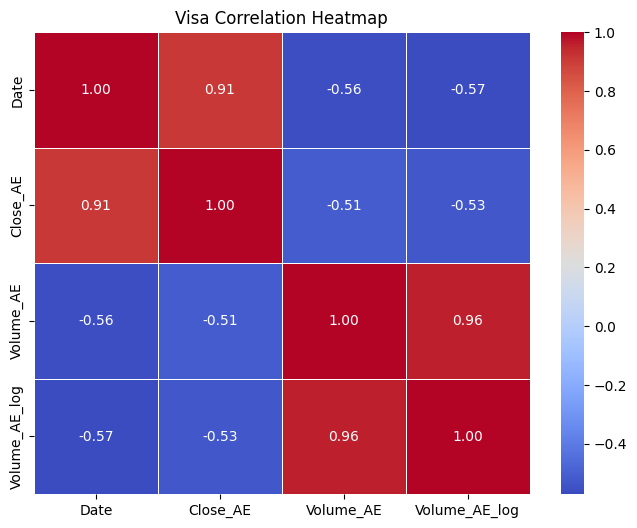

In [25]:
matrix = df_ae.drop(columns=['Open_AE', 'Low_AE','High_AE',]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Visa Correlation Heatmap")
plt.show()

Widać silne lub umiarkowne korelacje dla każdego z czynników. 
Przede wszytskim widać bardzo silną korelację czasu i ceny zamknięcia akcji co jest podstawą szeregów czasowych - trend rosnący
 - Obrót wolumenów koreluje ujemnie z ceną akcji w widocznym stopniu. Kiedy cena akcji jest wysoka, to spada ilośc kupionych wolumenów i odwrotnie
 - Widać równiez ujemną korelację dla wolumenóœ i daty co mówi nam o trendzie malejącym

## Testy

Sprawdzam stacjonarność dla analizy VAR

In [ ]:
def adf_test(series, label, alpha=0.05):
    """
    Wykonuje test ADF i wypisuje czytelne wyniki.
    """
    stat, p_value, _, _, critical_values, _ = adfuller(series.dropna())

    print("=" * 60)
    print(f"ADF TEST | {label}")
    print("=" * 60)
    print(f"Statystyka testowa: {stat:.4f}")
    print(f"p-value:            {p_value:.4f}")

    if p_value < alpha:
        print("Wniosek: STACJONARNY (odrzucamy H0)")
    else:
        print("Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)")

    print("Wartości krytyczne:")
    for key, value in critical_values.items():
        print(f"  {key}: {value:.4f}")

    print("\n")


In [ ]:
# CENY
adf_test(df_m["Close_M"], "Mastercard – Close")
adf_test(df_v["Close_V"], "Visa – Close")


ADF TEST | Mastercard – Close
Statystyka testowa: 1.1658
p-value:            0.9957
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4704
  5%: -2.8791
  10%: -2.5761


ADF TEST | Visa – Close
Statystyka testowa: 0.5057
p-value:            0.9850
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4722
  5%: -2.8799
  10%: -2.5766




In [ ]:
# Ceny American Express
adf_test(df_ae["Close_AE"], "American Express – Close")

ADF TEST | American Express – Close
Statystyka testowa: 0.6582
p-value:            0.9890
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4711
  5%: -2.8794
  10%: -2.5763




Dane dla cen akcji są niestacjonarne, trzeba będzie wykonać różnicowanie


In [27]:
# WOLUMEN
adf_test(df_m["Volume_M"], "Mastercard – Volume")
adf_test(df_v["Volume_V"], "Visa – Volume")

ADF TEST | Mastercard – Volume
Statystyka testowa: -1.6850
p-value:            0.4389
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4719
  5%: -2.8798
  10%: -2.5765


ADF TEST | Visa – Volume
Statystyka testowa: -11.7536
p-value:            0.0000
Wniosek: STACJONARNY (odrzucamy H0)
Wartości krytyczne:
  1%: -3.4687
  5%: -2.8784
  10%: -2.5758




In [28]:
# Wolumen American Express
adf_test(df_ae["Volume_AE"], "American Express – Volume")

ADF TEST | American Express – Volume
Statystyka testowa: -2.3753
p-value:            0.1488
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4714
  5%: -2.8796
  10%: -2.5764




Wolumey dla Visy  są stacjonarne, ale dla AMercian Express i mastercarda już nie

## Różnicowanie danych

Ze względu, że ceny akcji to dane niestacjonarne trzeba zrobić różnicowanie, aby dane były stacjonarne. Jest to konieczne do analizy VAR.

In [ ]:
diff_seasonal_ae = df_monthly['Close_AE'].diff(12).dropna() #12 miesięcy
diff_seasonal_m  = df_monthly['Close_M'].diff(12).dropna()
diff_seasonal_v  = df_monthly['Close_V'].diff(12).dropna()


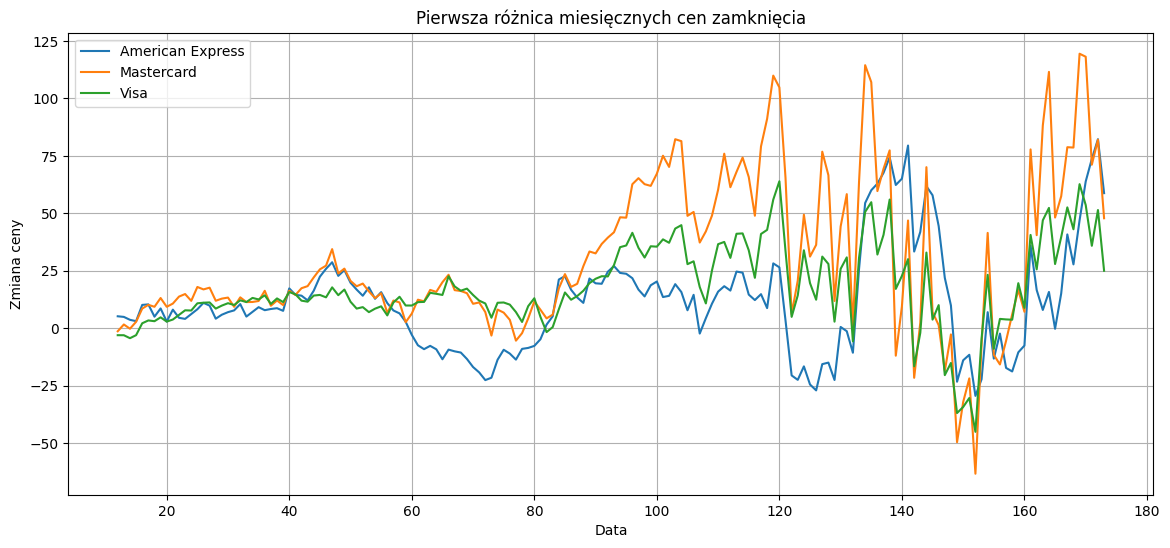

In [89]:
plt.figure(figsize=(14, 6))
plt.plot(diff_seasonal_ae, label='American Express')
plt.plot(diff_seasonal_m, label='Mastercard')
plt.plot(diff_seasonal_v, label='Visa')

plt.title('Pierwsza różnica miesięcznych cen zamknięcia')
plt.xlabel('Data')
plt.ylabel('Zmiana ceny')
plt.legend()
plt.grid(True)
plt.show()

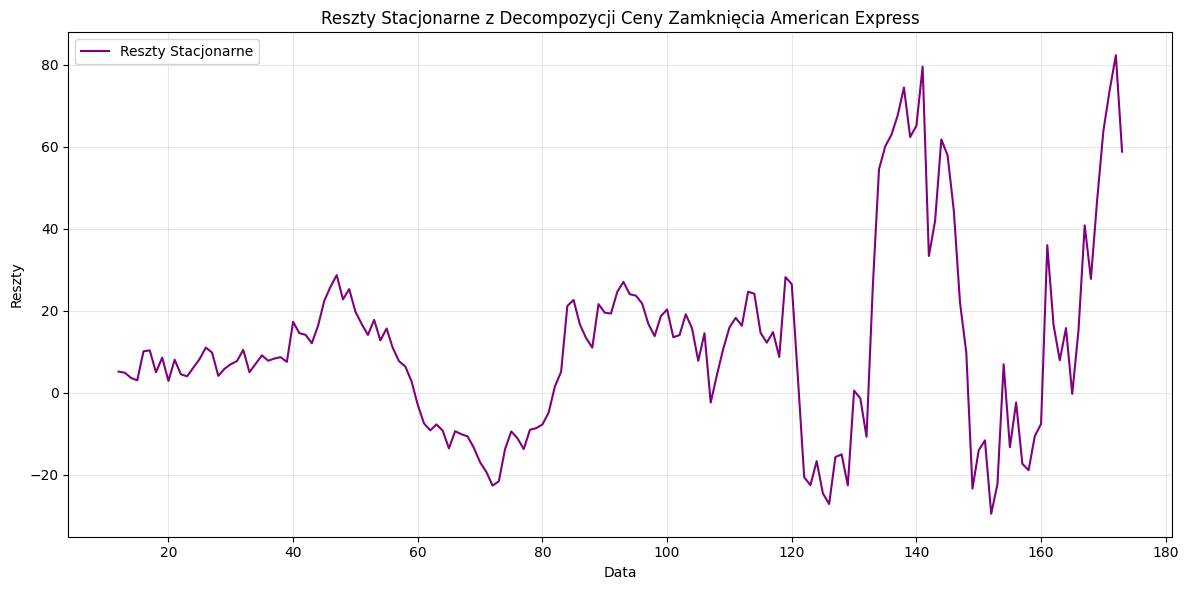

ADF TEST | American Express – Reszty Stacjonarne
Statystyka testowa: -2.7155
p-value:            0.0714
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4750
  5%: -2.8811
  10%: -2.5772




In [90]:
#Wykres AE + adf
plt.figure(figsize=(12, 6))
plt.plot(diff_seasonal_ae.index, diff_seasonal_ae, label='Reszty Stacjonarne', color='purple')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia American Express')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(diff_seasonal_ae, "American Express – Reszty Stacjonarne")

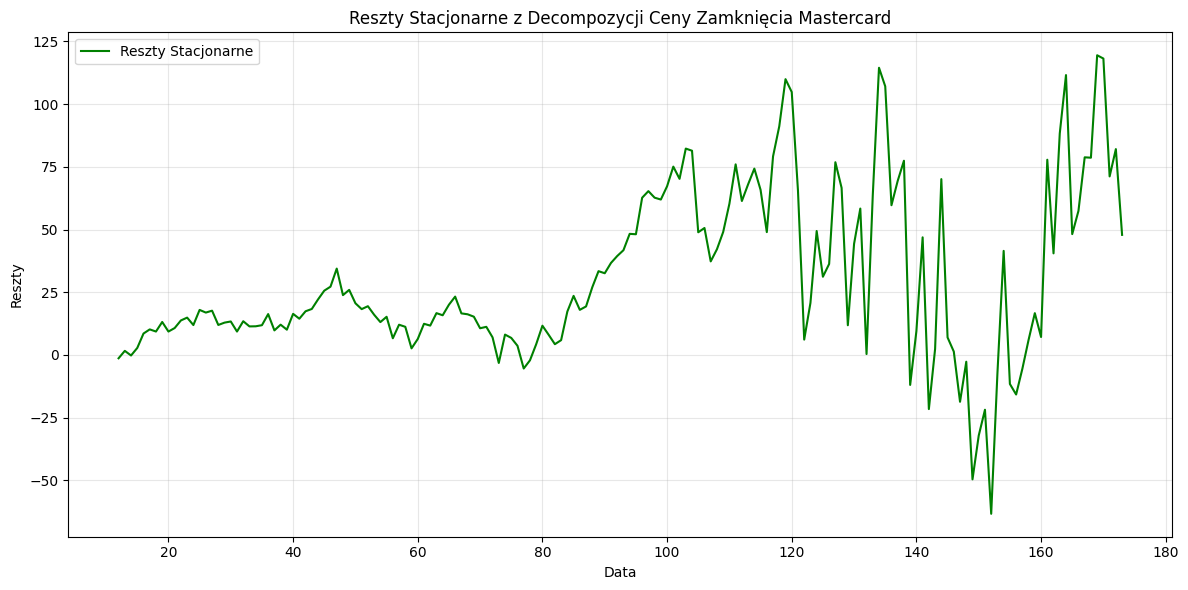

ADF TEST | Mastercard – Reszty Stacjonarne
Statystyka testowa: -1.8005
p-value:            0.3802
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4756
  5%: -2.8814
  10%: -2.5774




In [91]:
# Wykres M + adf
plt.figure(figsize=(12, 6))
plt.plot(diff_seasonal_m.index, diff_seasonal_m, label='Reszty Stacjonarne', color='green')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia Mastercard')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(diff_seasonal_m, "Mastercard – Reszty Stacjonarne")

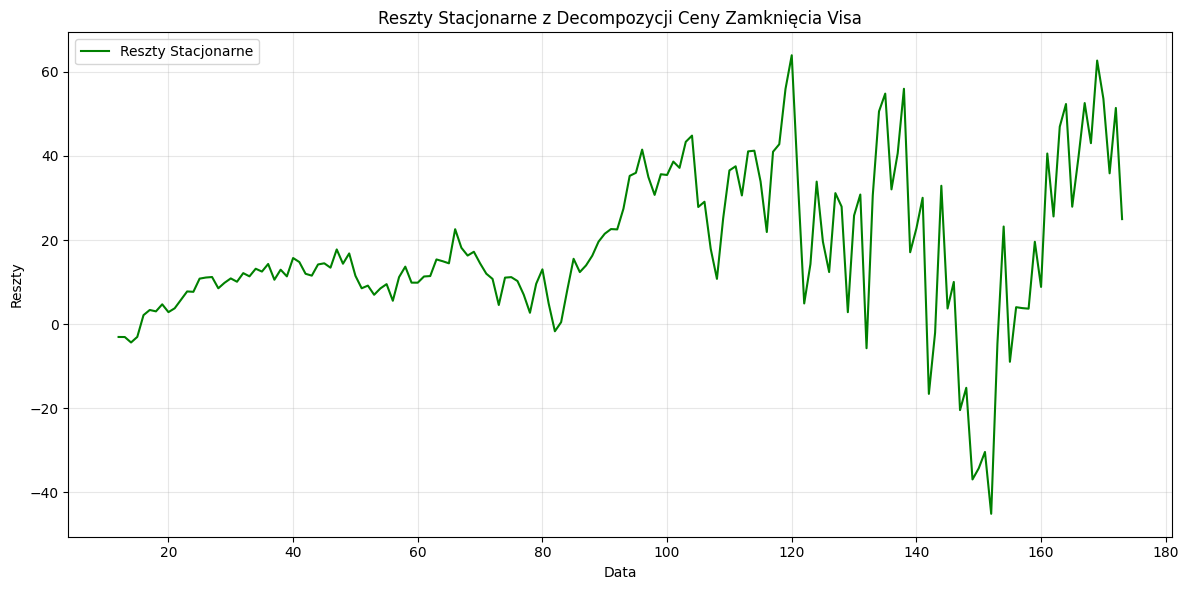

ADF TEST | Visa – Reszty Stacjonarne
Statystyka testowa: -2.1387
p-value:            0.2292
Wniosek: NIESTACJONARNY (brak podstaw do odrzucenia H0)
Wartości krytyczne:
  1%: -3.4756
  5%: -2.8814
  10%: -2.5774




In [92]:
# Wykres V + adf
plt.figure(figsize=(12, 6))
plt.plot(diff_seasonal_v.index, diff_seasonal_v, label='Reszty Stacjonarne', color='green')
plt.title('Reszty Stacjonarne z Decompozycji Ceny Zamknięcia Visa')
plt.xlabel('Data')
plt.ylabel('Reszty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

adf_test(diff_seasonal_v, "Visa – Reszty Stacjonarne")


Pomimo różnicowania dane nie wyszły stacjonarne więc nie mozna zrobić VAR. Sprawdzamy kointergencje dla VEC. jeśli ta wyjdzie istotna statystycznie można przeprowadzić VEC

## Test kointergencji 

In [93]:
dane = df_monthly[['Close_AE', 'Close_M', 'Close_V']].dropna()

In [ ]:
# Test Johansena dla kointegracji
# H0: brak kointegracji
def test_johansena(df, det_order=0, k_ar_diff=1):
    """
    det_order: -1 (brak trendu), 0 (const), 1 (trend)
    k_ar_diff: opóźnienia dla różnic
    """
    wynik = coint_johansen(df, det_order=det_order, k_ar_diff=k_ar_diff)

    print("=== TEST KOINTEGRACJI JOHANSENA ===\n")
    print("Liczba zmiennych:", df.shape[1])
    print("\nStatystyka śladu (Trace statistic):")

    for i in range(len(wynik.lr1)):
        print(f"\nr = {i}:")
        print(f"  Statystyka: {wynik.lr1[i]:.2f}")
        print(f"  Wartość krytyczna (5%): {wynik.cvt[i, 1]:.2f}")
        if wynik.lr1[i] > wynik.cvt[i, 1]:
            print(f"  ✓ Odrzucamy H0 - jest kointegracja")
        else:
            print(f"  ✗ Nie odrzucamy H0")

    return wynik

# Użycie na niestacjonarnych danych
wynik_johansen = test_johansena(dane, det_order=0, k_ar_diff=2)

=== TEST KOINTEGRACJI JOHANSENA ===

Liczba zmiennych: 3

Statystyka śladu (Trace statistic):

r = 0:
  Statystyka: 17.75
  Wartość krytyczna (5%): 29.80
  ✗ Nie odrzucamy H0

r = 1:
  Statystyka: 9.17
  Wartość krytyczna (5%): 15.49
  ✗ Nie odrzucamy H0

r = 2:
  Statystyka: 0.87
  Wartość krytyczna (5%): 3.84
  ✗ Nie odrzucamy H0


Dane nie wyszły kointergentne, więc trzeba zupełnie odrzucić analizę VEC - zostaje LSTM

## LSTM

Seed dla powtarzalności

In [95]:
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
df_close.shape

(174, 4)

Normlizacja danych

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[['Close_M', 'Close_V', 'Close_AE']])
print(scaled_data[:5])

[[0.0138164  0.02067518 0.01505695]
 [0.01365451 0.01975364 0.01471561]
 [0.01354374 0.01868613 0.01721896]
 [0.013188   0.01941606 0.01977132]
 [0.01320717 0.01963503 0.019657  ]]


Tworzenie sekwencji

In [98]:
def create_sequences(data, seq_length):
    X, y = [], []

    for i in range(len(data) - seq_length):
        # Sekwencja wejściowa
        X.append(data[i:i + seq_length])
        # Wartość docelowa (następny krok)
        y.append(data[i + seq_length])

    return np.array(X), np.array(y)

Tworzenie X i y

In [99]:
X, y = create_sequences(scaled_data, seq_length=60)

In [100]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2868, 60, 3), y_train shape: (2868, 3)
X_test shape: (718, 60, 3), y_test shape: (718, 3)


### Walidacja danych 

In [101]:
#walidacja 
val_size = int(len(X_train) * 0.2)
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (2295, 60, 3), y_train shape: (2295, 3)
X_val shape: (573, 60, 3), y_val shape: (573, 3)


### Grid Search

In [ ]:
param_grid = {
    'lstm_units_1': [32, 64, 128],      # Pierwsza warstwa LSTM
    'lstm_units_2': [32, 64],       # Druga warstwa LSTM
    'learning_rate': [0.001, 0.0001], # Szybkość uczenia
    'batch_size': [16, 32]          # Rozmiar partii
}


keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)] # wszystkie możliwe kombinacje

print(f"Liczba kombinacji do sprawdzenia: {len(combinations)}")

# Zmienne do przechowywania wyników
results = []
best_score = float('inf')
best_params = {}
best_model = None


for i, params in enumerate(combinations):
    print(f"\n--- Trening kombinacji {i+1}/{len(combinations)}: {params} ---")
    
    
    model = Sequential()
    model.add(LSTM(params['lstm_units_1'], activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(params['lstm_units_2'], activation='tanh', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=3))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    # Early Stopping - dosyć krótki dla grid search, żeby przyśpieszyć działanie
    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    
    # Trening
    history = model.fit(
        X_train, y_train,
        epochs=50, # Mniejsza liczba epok dla testów
        batch_size=params['batch_size'],
        validation_data=(X_val, y_val),
        callbacks=[es],
        verbose=0 
    )
    
    # Ocena wyniku 
    val_loss = min(history.history['val_loss'])
    print(f"Wynik (Val Loss): {val_loss:.5f}")
    
    # Zapisujemy wyniki
    results.append({**params, 'val_loss': val_loss})
    
    # czy to najlepszy model
    if val_loss < best_score:
        best_score = val_loss
        best_params = params
        model.save('best_grid_search_model.h5')
        print("nowy najlepszy wynik")

print()
print("NAJLEPSZE PARAMETRY:")
print(best_params)
print(f"Najlepszy Val Loss: {best_score:.5f}")
print()

#tabela wszystkich wyników
df_results = pd.DataFrame(results).sort_values(by='val_loss')
print(df_results)

Liczba kombinacji do sprawdzenia: 24

--- Trening kombinacji 1/24: {'lstm_units_1': 32, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 16} ---


Wynik (Val Loss): 0.00083
nowy najlepszy wynik

--- Trening kombinacji 2/24: {'lstm_units_1': 32, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00096

--- Trening kombinacji 3/24: {'lstm_units_1': 32, 'lstm_units_2': 32, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00123

--- Trening kombinacji 4/24: {'lstm_units_1': 32, 'lstm_units_2': 32, 'learning_rate': 0.0001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00121

--- Trening kombinacji 5/24: {'lstm_units_1': 32, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 16} ---


Wynik (Val Loss): 0.00071
nowy najlepszy wynik

--- Trening kombinacji 6/24: {'lstm_units_1': 32, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 32} ---


Wynik (Val Loss): 0.00070
nowy najlepszy wynik

--- Trening kombinacji 7/24: {'lstm_units_1': 32, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00099

--- Trening kombinacji 8/24: {'lstm_units_1': 32, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00140

--- Trening kombinacji 9/24: {'lstm_units_1': 64, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00073

--- Trening kombinacji 10/24: {'lstm_units_1': 64, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 32} ---


Wynik (Val Loss): 0.00068
nowy najlepszy wynik

--- Trening kombinacji 11/24: {'lstm_units_1': 64, 'lstm_units_2': 32, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00097

--- Trening kombinacji 12/24: {'lstm_units_1': 64, 'lstm_units_2': 32, 'learning_rate': 0.0001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00108

--- Trening kombinacji 13/24: {'lstm_units_1': 64, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 16} ---


Wynik (Val Loss): 0.00060
nowy najlepszy wynik

--- Trening kombinacji 14/24: {'lstm_units_1': 64, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00063

--- Trening kombinacji 15/24: {'lstm_units_1': 64, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00100

--- Trening kombinacji 16/24: {'lstm_units_1': 64, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00107

--- Trening kombinacji 17/24: {'lstm_units_1': 128, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00064

--- Trening kombinacji 18/24: {'lstm_units_1': 128, 'lstm_units_2': 32, 'learning_rate': 0.001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00072

--- Trening kombinacji 19/24: {'lstm_units_1': 128, 'lstm_units_2': 32, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00091

--- Trening kombinacji 20/24: {'lstm_units_1': 128, 'lstm_units_2': 32, 'learning_

Wynik (Val Loss): 0.00052
nowy najlepszy wynik

--- Trening kombinacji 22/24: {'lstm_units_1': 128, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00054

--- Trening kombinacji 23/24: {'lstm_units_1': 128, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 16} ---
Wynik (Val Loss): 0.00075

--- Trening kombinacji 24/24: {'lstm_units_1': 128, 'lstm_units_2': 64, 'learning_rate': 0.0001, 'batch_size': 32} ---
Wynik (Val Loss): 0.00087

NAJLEPSZE PARAMETRY:
{'lstm_units_1': 128, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 16}
Najlepszy Val Loss: 0.00052

    lstm_units_1  lstm_units_2  learning_rate  batch_size  val_loss
20           128            64         0.0010          16  0.000521
21           128            64         0.0010          32  0.000539
12            64            64         0.0010          16  0.000605
13            64            64         0.0010          32  0.000634
16           128            32         0.

Najlepsza kombinacja dla grid search wyszła {'lstm_units_1': 128, 'lstm_units_2': 64, 'learning_rate': 0.001, 'batch_size': 16}
Najlepszy Val Loss: 0.00052 - bardzo bardzo dobry wynik czy overfitting?

Raczej nie jest to overfitting. Widac wyraźną różnicę, że wraz z ilością neuronów w ukrytych poziomach sieci zmniejsza się val_loss. Widac również duże zależności:
- learning rate = 0.001 znacznie wygrywa z 0.0001 (2.5 tys danych to nie tak dużo)
- batch size lepiej działa dla 16, ale nie jest to tak ważny element jak lr

### Najlepszy model budowa i trenowanie 

In [ ]:
# model z najlepszymi parametrami
final_model = Sequential()
final_model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
final_model.add(Dropout(0.2))
final_model.add(LSTM(64, activation='tanh', return_sequences=False))
final_model.add(Dropout(0.2))
final_model.add(Dense(units=3))

optimizer_final = Adam(learning_rate=0.001)

final_model.compile(
    optimizer=optimizer_final,
    loss='mean_squared_error',
    metrics=['mae']
)

# Early stopping z większym patience
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=30, 
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = final_model.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/100
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0078 - mae: 0.0530
Epoch 1: val_loss improved from None to 0.00354, saving model to best_lstm_model.h5



Epoch 1: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0028 - mae: 0.0322 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.4909e-04 - mae: 0.0192
Epoch 2: val_loss improved from 0.00354 to 0.00200, saving model to best_lstm_model.h5



Epoch 2: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.7944e-04 - mae: 0.0181 - val_loss: 0.0020 - val_mae: 0.0358
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.4574e-04 - mae: 0.0170
Epoch 3: val_loss improved from 0.00200 to 0.00152, saving model to best_lstm_model.h5



Epoch 3: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.2933e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 4/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.8276e-04 - mae: 0.0164
Epoch 4: val_loss improved from 0.00152 to 0.00136, saving model to best_lstm_model.h5



Epoch 4: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.3983e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0292
Epoch 5/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.0326e-04 - mae: 0.0152
Epoch 5: val_loss improved from 0.00136 to 0.00097, saving model to best_lstm_model.h5



Epoch 5: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.7075e-04 - mae: 0.0147 - val_loss: 9.6789e-04 - val_mae: 0.0232
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.6938e-04 - mae: 0.0144
Epoch 6: val_loss improved from 0.00097 to 0.00089, saving model to best_lstm_model.h5



Epoch 6: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.2133e-04 - mae: 0.0139 - val_loss: 8.8815e-04 - val_mae: 0.0224
Epoch 7/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.4108e-04 - mae: 0.0144
Epoch 7: val_loss improved from 0.00089 to 0.00084, saving model to best_lstm_model.h5



Epoch 7: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.3121e-04 - mae: 0.0141 - val_loss: 8.4168e-04 - val_mae: 0.0217
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.1339e-04 - mae: 0.0135
Epoch 8: val_loss did not improve from 0.00084
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.7850e-04 - mae: 0.0131 - val_loss: 0.0018 - val_mae: 0.0359
Epoch 9/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.4996e-04 - mae: 0.0127
Epoch 9: val_loss did not improve from 0.00084
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.3340e-04 - mae: 0.0124 - val_loss: 0.0010 - val_mae: 0.0242
Epoch 10/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.4226e-04 - mae: 0.0127
Epoch 10: val_loss improved from 0.00084 to 0.00079, saving model to best_lstm_model.h5



Epoch 10: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.2392e-04 - mae: 0.0123 - val_loss: 7.8843e-04 - val_mae: 0.0204
Epoch 11/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.5214e-04 - mae: 0.0128
Epoch 11: val_loss did not improve from 0.00079
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.1048e-04 - mae: 0.0120 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 12/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.9920e-04 - mae: 0.0120
Epoch 12: val_loss improved from 0.00079 to 0.00079, saving model to best_lstm_model.h5



Epoch 12: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.7880e-04 - mae: 0.0115 - val_loss: 7.8714e-04 - val_mae: 0.0203
Epoch 13/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5791e-04 - mae: 0.0111
Epoch 13: val_loss did not improve from 0.00079
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.6974e-04 - mae: 0.0113 - val_loss: 8.6614e-04 - val_mae: 0.0230
Epoch 14/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3794e-04 - mae: 0.0107
Epoch 14: val_loss did not improve from 0.00079
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.3284e-04 - mae: 0.0107 - val_loss: 8.2291e-04 - val_mae: 0.0207
Epoch 15/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5318e-04 - mae: 0.0111
Epoch 15: val_loss did not improve from 0.00079
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.5558e-04 - mae: 0.0111 - val_loss: 0.0012 - val_mae: 0.0296
Epoch 16/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.2005e-04 - mae: 0.0103
Epoch


Epoch 16: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.2824e-04 - mae: 0.0105 - val_loss: 7.8240e-04 - val_mae: 0.0203
Epoch 17/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.5729e-04 - mae: 0.0110
Epoch 17: val_loss improved from 0.00078 to 0.00076, saving model to best_lstm_model.h5



Epoch 17: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.4291e-04 - mae: 0.0107 - val_loss: 7.5514e-04 - val_mae: 0.0200
Epoch 18/100
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3932e-04 - mae: 0.0110
Epoch 18: val_loss did not improve from 0.00076
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1451e-04 - mae: 0.0103 - val_loss: 8.9718e-04 - val_mae: 0.0240
Epoch 19/100
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.0804e-04 - mae: 0.0101
Epoch 19: val_loss did not improve from 0.00076
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.0065e-04 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0282
Epoch 20/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.4753e-04 - mae: 0.0110
Epoch 20: val_loss did not improve from 0.00076
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.3170e-04 - mae: 0.0107 - val_loss: 0.0016 - val_mae: 0.0340
Epoch 21/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.0439e-04 - mae: 0.0102
Epoch 21:


Epoch 22: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9848e-04 - mae: 0.0100 - val_loss: 7.0845e-04 - val_mae: 0.0207
Epoch 23/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8155e-04 - mae: 0.0095
Epoch 23: val_loss improved from 0.00071 to 0.00066, saving model to best_lstm_model.h5



Epoch 23: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8530e-04 - mae: 0.0095 - val_loss: 6.6155e-04 - val_mae: 0.0194
Epoch 24/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.1787e-04 - mae: 0.0102
Epoch 24: val_loss improved from 0.00066 to 0.00065, saving model to best_lstm_model.h5



Epoch 24: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.0737e-04 - mae: 0.0100 - val_loss: 6.4545e-04 - val_mae: 0.0183
Epoch 25/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8795e-04 - mae: 0.0096
Epoch 25: val_loss did not improve from 0.00065
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8266e-04 - mae: 0.0094 - val_loss: 6.7600e-04 - val_mae: 0.0201
Epoch 26/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6674e-04 - mae: 0.0093
Epoch 26: val_loss improved from 0.00065 to 0.00063, saving model to best_lstm_model.h5



Epoch 26: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.6657e-04 - mae: 0.0092 - val_loss: 6.2910e-04 - val_mae: 0.0189
Epoch 27/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.5858e-04 - mae: 0.0090
Epoch 27: val_loss did not improve from 0.00063
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.6996e-04 - mae: 0.0092 - val_loss: 9.9091e-04 - val_mae: 0.0244
Epoch 28/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.2008e-04 - mae: 0.0107
Epoch 28: val_loss did not improve from 0.00063
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.9118e-04 - mae: 0.0099 - val_loss: 7.3123e-04 - val_mae: 0.0216
Epoch 29/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8978e-04 - mae: 0.0098
Epoch 29: val_loss improved from 0.00063 to 0.00061, saving model to best_lstm_model.h5



Epoch 29: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8012e-04 - mae: 0.0096 - val_loss: 6.1442e-04 - val_mae: 0.0179
Epoch 30/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7148e-04 - mae: 0.0095
Epoch 30: val_loss did not improve from 0.00061
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6587e-04 - mae: 0.0092 - val_loss: 6.3484e-04 - val_mae: 0.0182
Epoch 31/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8847e-04 - mae: 0.0099
Epoch 31: val_loss did not improve from 0.00061
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6847e-04 - mae: 0.0093 - val_loss: 8.6810e-04 - val_mae: 0.0222
Epoch 32/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8588e-04 - mae: 0.0099
Epoch 32: val_loss improved from 0.00061 to 0.00060, saving model to best_lstm_model.h5



Epoch 32: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.7196e-04 - mae: 0.0094 - val_loss: 6.0461e-04 - val_mae: 0.0184
Epoch 33/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.7046e-04 - mae: 0.0093
Epoch 33: val_loss did not improve from 0.00060
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.5837e-04 - mae: 0.0090 - val_loss: 6.1425e-04 - val_mae: 0.0178
Epoch 34/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.7165e-04 - mae: 0.0096
Epoch 34: val_loss improved from 0.00060 to 0.00057, saving model to best_lstm_model.h5



Epoch 34: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6180e-04 - mae: 0.0093 - val_loss: 5.6714e-04 - val_mae: 0.0172
Epoch 35/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.5684e-04 - mae: 0.0089
Epoch 35: val_loss did not improve from 0.00057
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.5438e-04 - mae: 0.0089 - val_loss: 6.9112e-04 - val_mae: 0.0207
Epoch 36/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7923e-04 - mae: 0.0095
Epoch 36: val_loss did not improve from 0.00057
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.7723e-04 - mae: 0.0097 - val_loss: 6.9553e-04 - val_mae: 0.0198
Epoch 37/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.9613e-04 - mae: 0.0102
Epoch 37: val_loss improved from 0.00057 to 0.00055, saving model to best_lstm_model.h5



Epoch 37: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.7287e-04 - mae: 0.0096 - val_loss: 5.4582e-04 - val_mae: 0.0170
Epoch 38/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8607e-04 - mae: 0.0098
Epoch 38: val_loss did not improve from 0.00055
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8508e-04 - mae: 0.0097 - val_loss: 0.0010 - val_mae: 0.0256
Epoch 39/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.4279e-04 - mae: 0.0116
Epoch 39: val_loss did not improve from 0.00055
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9681e-04 - mae: 0.0103 - val_loss: 6.2379e-04 - val_mae: 0.0192
Epoch 40/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.5072e-04 - mae: 0.0089
Epoch 40: val_loss did not improve from 0.00055
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4570e-04 - mae: 0.0087 - val_loss: 6.4140e-04 - val_mae: 0.0180
Epoch 41/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7159e-04 - mae: 0.0096
Epoch


Epoch 45: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4055e-04 - mae: 0.0087 - val_loss: 5.2896e-04 - val_mae: 0.0170
Epoch 46/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.4869e-04 - mae: 0.0087
Epoch 46: val_loss did not improve from 0.00053
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.3836e-04 - mae: 0.0085 - val_loss: 5.6607e-04 - val_mae: 0.0178
Epoch 47/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6846e-04 - mae: 0.0095
Epoch 47: val_loss did not improve from 0.00053
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.6467e-04 - mae: 0.0094 - val_loss: 5.6893e-04 - val_mae: 0.0180
Epoch 48/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.9138e-04 - mae: 0.0098
Epoch 48: val_loss did not improve from 0.00053
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6620e-04 - mae: 0.0092 - val_loss: 6.1872e-04 - val_mae: 0.0195
Epoch 49/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3864e-04 - mae: 0.0084
E


Epoch 50: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4483e-04 - mae: 0.0088 - val_loss: 5.1174e-04 - val_mae: 0.0162
Epoch 51/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.6204e-04 - mae: 0.0091
Epoch 51: val_loss did not improve from 0.00051
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.5096e-04 - mae: 0.0088 - val_loss: 5.4818e-04 - val_mae: 0.0168
Epoch 52/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4250e-04 - mae: 0.0086
Epoch 52: val_loss did not improve from 0.00051
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4452e-04 - mae: 0.0087 - val_loss: 7.2117e-04 - val_mae: 0.0219
Epoch 53/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.5583e-04 - mae: 0.0091
Epoch 53: val_loss did not improve from 0.00051
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6021e-04 - mae: 0.0092 - val_loss: 5.8221e-04 - val_mae: 0.0189
Epoch 54/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.6124e-04 - mae: 0.0092
E


Epoch 59: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6547e-04 - mae: 0.0095 - val_loss: 5.0272e-04 - val_mae: 0.0166
Epoch 60/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7003e-04 - mae: 0.0097
Epoch 60: val_loss did not improve from 0.00050
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6181e-04 - mae: 0.0093 - val_loss: 6.9219e-04 - val_mae: 0.0214
Epoch 61/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4275e-04 - mae: 0.0086
Epoch 61: val_loss did not improve from 0.00050
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4089e-04 - mae: 0.0086 - val_loss: 5.0988e-04 - val_mae: 0.0163
Epoch 62/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.5947e-04 - mae: 0.0093
Epoch 62: val_loss did not improve from 0.00050
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.5853e-04 - mae: 0.0092 - val_loss: 8.4935e-04 - val_mae: 0.0233
Epoch 63/100
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.9797e-04 - mae: 0.0103
E


Epoch 64: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4817e-04 - mae: 0.0089 - val_loss: 4.9281e-04 - val_mae: 0.0163
Epoch 65/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4948e-04 - mae: 0.0091
Epoch 65: val_loss did not improve from 0.00049
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4881e-04 - mae: 0.0089 - val_loss: 5.6662e-04 - val_mae: 0.0179
Epoch 66/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.7316e-04 - mae: 0.0095
Epoch 66: val_loss did not improve from 0.00049
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.5721e-04 - mae: 0.0092 - val_loss: 4.9391e-04 - val_mae: 0.0160
Epoch 67/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.5492e-04 - mae: 0.0093
Epoch 67: val_loss did not improve from 0.00049
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4626e-04 - mae: 0.0088 - val_loss: 0.0011 - val_mae: 0.0287
Epoch 68/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4000e-04 - mae: 0.0088
Epoch


Epoch 82: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.4232e-04 - mae: 0.0087 - val_loss: 4.8589e-04 - val_mae: 0.0164
Epoch 83/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4784e-04 - mae: 0.0089
Epoch 83: val_loss did not improve from 0.00049
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3694e-04 - mae: 0.0088 - val_loss: 4.9556e-04 - val_mae: 0.0166
Epoch 84/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4604e-04 - mae: 0.0089
Epoch 84: val_loss did not improve from 0.00049
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.3908e-04 - mae: 0.0087 - val_loss: 0.0011 - val_mae: 0.0293
Epoch 85/100
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6043e-04 - mae: 0.0092
Epoch 85: val_loss improved from 0.00049 to 0.00045, saving model to best_lstm_model.h5



Epoch 85: finished saving model to best_lstm_model.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4193e-04 - mae: 0.0086 - val_loss: 4.5225e-04 - val_mae: 0.0156
Epoch 86/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4299e-04 - mae: 0.0087
Epoch 86: val_loss did not improve from 0.00045
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3598e-04 - mae: 0.0085 - val_loss: 4.9858e-04 - val_mae: 0.0165
Epoch 87/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4314e-04 - mae: 0.0088
Epoch 87: val_loss did not improve from 0.00045
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4301e-04 - mae: 0.0088 - val_loss: 7.8591e-04 - val_mae: 0.0234
Epoch 88/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3646e-04 - mae: 0.0085
Epoch 88: val_loss did not improve from 0.00045
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.4351e-04 - mae: 0.0087 - val_loss: 5.1674e-04 - val_mae: 0.0172
Epoch 89/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4662e-04 - mae: 0.0087
E

Wyszedł jeszcze lepszy val_loss - 0.00045

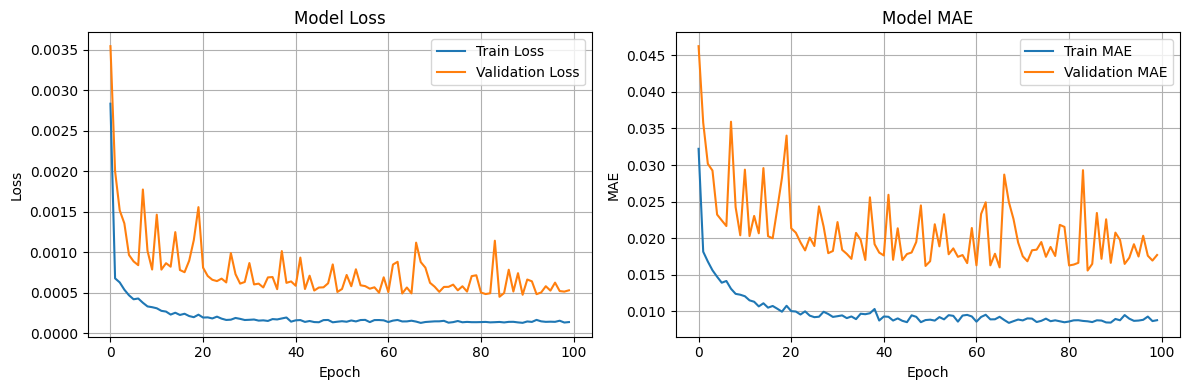

In [125]:
# Wykres loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Wykres MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Train loss raczej stabilnie się zmniejsza, validation poodbnie, ale bardzo skacze. raczej nie jest to overfitting bo validation nie rośnie (może minimalny?), gdy trening spada. Mocne wachania mogą być przyczyną szumów.

### Ewaluacja 

In [ ]:
test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

predictions = final_model.predict(X_test)

# Odwrócenie normalizacji
y_test_actual = scaler.inverse_transform(y_test) 
predictions = scaler.inverse_transform(predictions)

# Metryki
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Test Loss: 0.0014
Test MAE: 0.0254
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
MSE: 85.3912
MAE: 6.8590
RMSE: 9.2407
R²: 0.8981


- Test Loss i test MAE to dane znormalizowane i wyszły bardo dobre. To znaczy że overfitting nie występuje, bo model dobrze reaguje na dane, których nigdy nie widział
- MSE - cięzko odczytać
- MAE - błąd ok ~ 7$ przy cenach akcji od 200/300$ do nawet 400/500$ to bardzo dobry wynik nie odstający od prawdziwych danych. najwazniejsze jest to, że jeśli prawdziwe dane idą do góry to nasz model też
- RMSE - podobny wynik co z MAE ~ 9$. MAE jednak jest dokładniejsze, ze względu na niestabilniość danych - outliers. MAE mocno spłaszcza outliers a RMSE nie
- R^2 - duża wyjasnialnośc modelu jak dla danych giełdowych

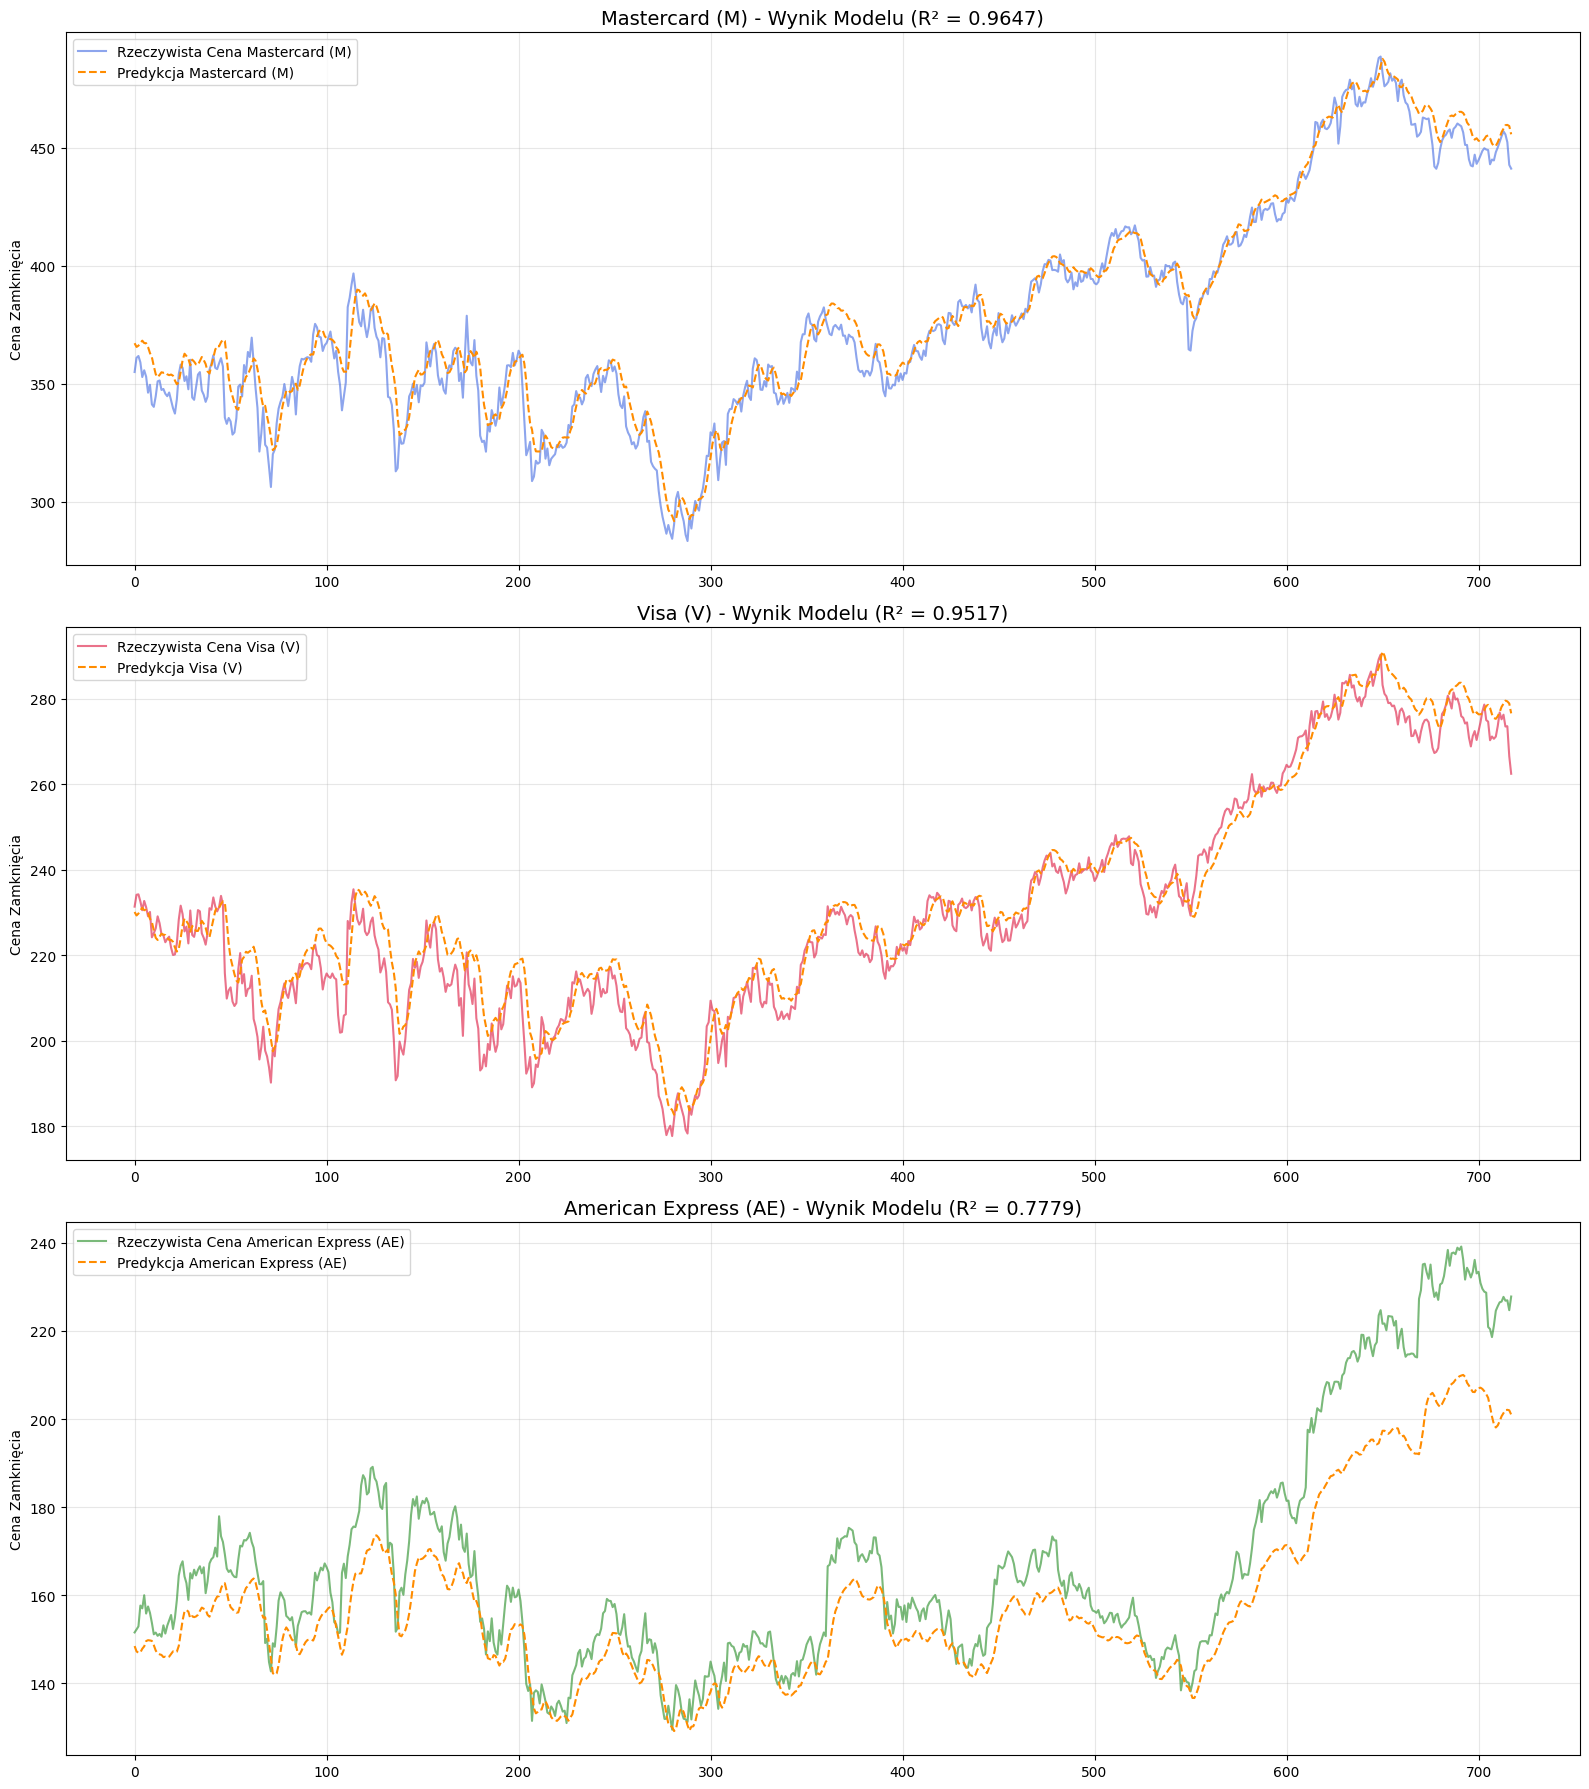

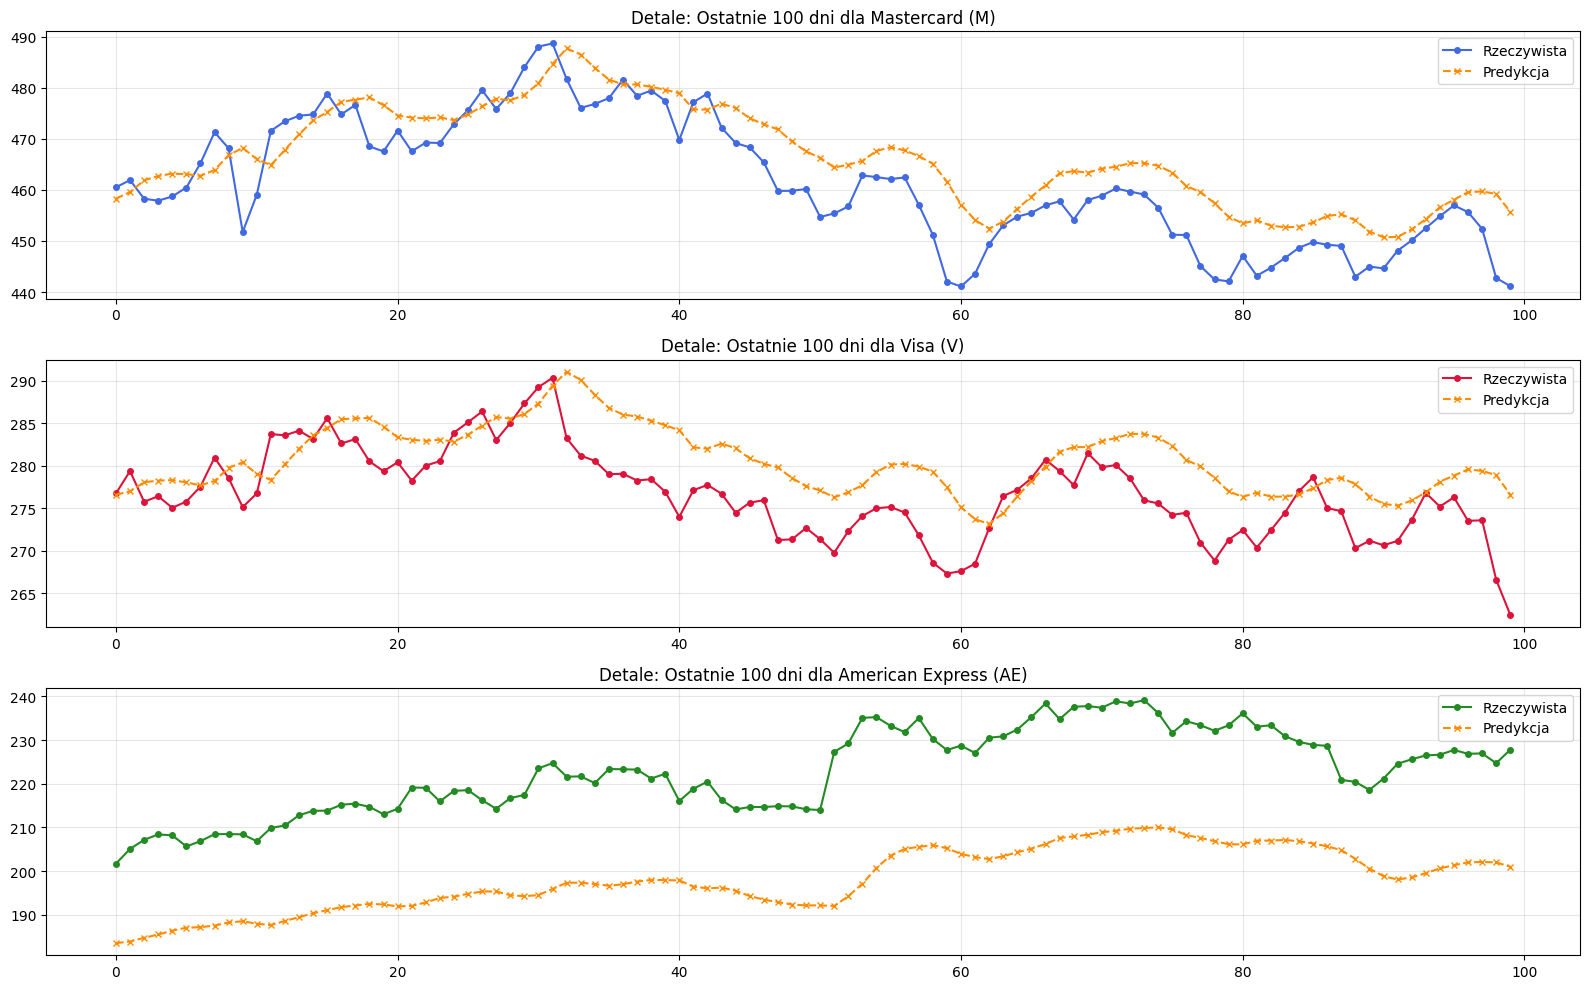

In [ ]:
assets = ['Mastercard (M)', 'Visa (V)', 'American Express (AE)']
colors = ['royalblue', 'crimson', 'forestgreen']
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

for i, asset in enumerate(assets):
    asset_r2 = r2_score(y_test_actual[:, i], predictions[:, i])
    axes[i].plot(y_test_actual[:, i], label=f'Rzeczywista Cena {asset}', color=colors[i], alpha=0.6)
    axes[i].plot(predictions[:, i], label=f'Predykcja {asset}', color='darkorange', linestyle='--')
    axes[i].set_title(f'{asset} - Wynik Modelu (R² = {asset_r2:.4f})', fontsize=14)
    axes[i].set_ylabel('Cena Zamknięcia')
    axes[i].legend(loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 10))

for i, asset in enumerate(assets):
    plt.subplot(3, 1, i+1)
    plt.plot(y_test_actual[-100:, i], label='Rzeczywista', color=colors[i], marker='o', markersize=4)
    plt.plot(predictions[-100:, i], label='Predykcja', color='darkorange', linestyle='--', marker='x', markersize=4)
    plt.title(f'Detale: Ostatnie 100 dni dla {asset}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Model działa niemal perfekcyjnie dla Visy i Mastercarda, jednak dla American Express widac niedoszacowanie w cenie. Linia samego modelu jest jednak adekwatna dla każdego z przypadków

### Predykcja

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


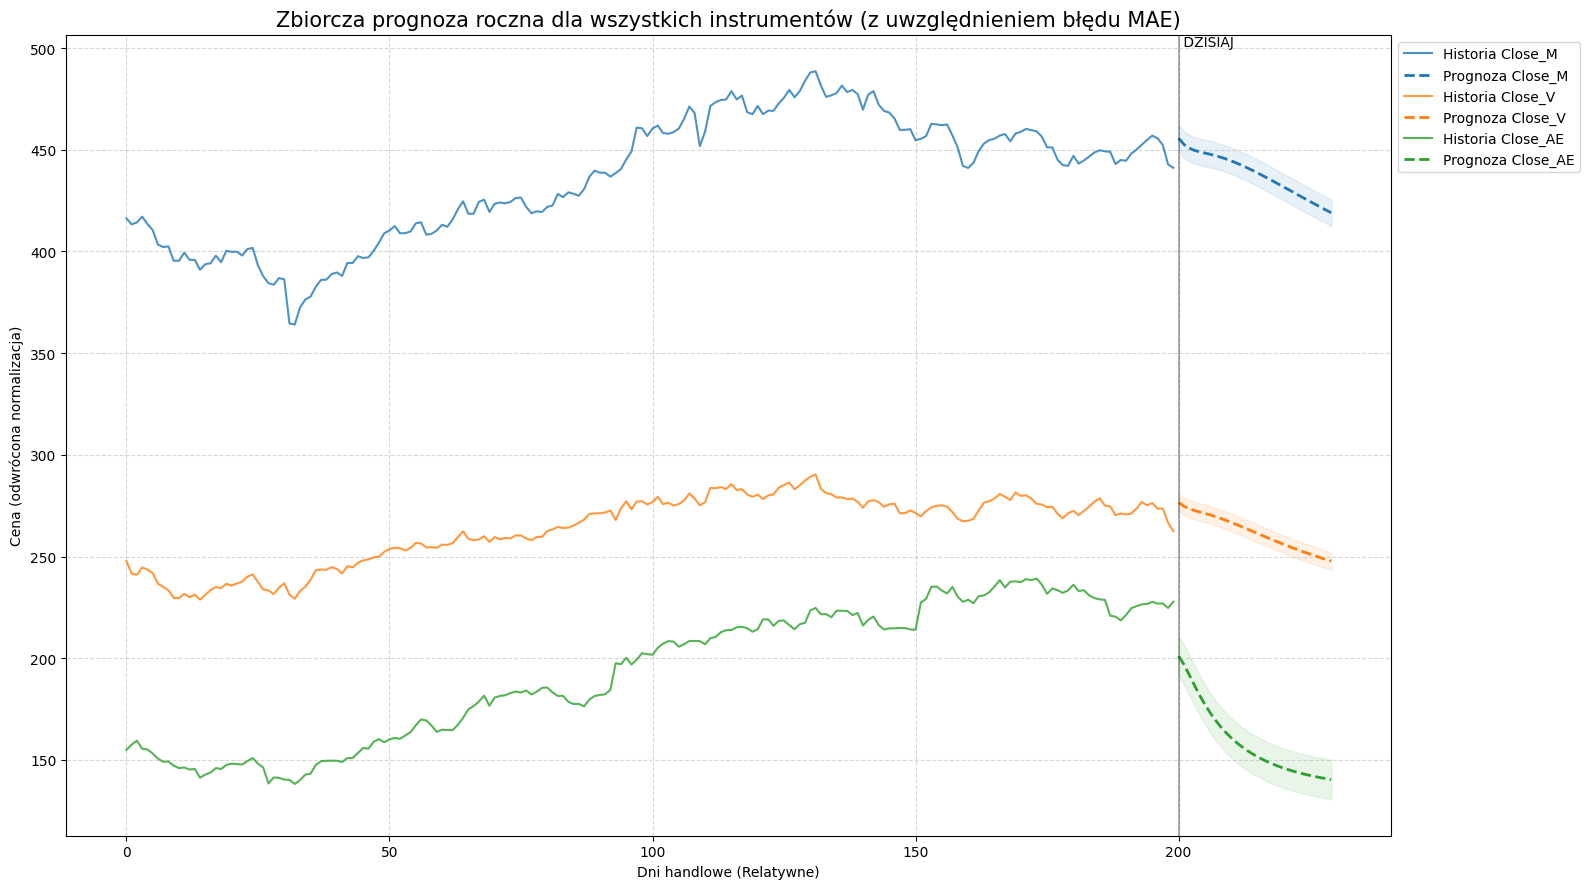

In [ ]:
def predict_future_all(model, last_sequence, n_steps, scaler):
    predictions = []
    current_seq = last_sequence.copy() 

    for _ in range(n_steps):
       
        input_data = current_seq.reshape(1, current_seq.shape[0], current_seq.shape[1])
        pred = model.predict(input_data, verbose=0) 
        predictions.append(pred[0])
        current_seq = np.append(current_seq[1:], pred, axis=0)

    return scaler.inverse_transform(np.array(predictions))


n_future = 30  # Rok handlowy
future_preds_raw = predict_future_all(final_model, X_test[-1], n_future, scaler)

history_len = 200
y_test_rescaled = scaler.inverse_transform(y_test)
hist_data = y_test_rescaled[-history_len:]

test_preds_all = scaler.inverse_transform(final_model.predict(X_test))
mae_values = np.mean(np.abs(y_test_rescaled - test_preds_all), axis=0)

plt.figure(figsize=(16, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Niebieski, Pomarańczowy, Zielony
column_names = ['Close_M', 'Close_V', 'Close_AE']

time_hist = np.arange(history_len)
time_fut = np.arange(history_len, history_len + n_future)

for i in range(3):
    plt.plot(time_hist, hist_data[:, i], color=colors[i], alpha=0.8, label=f'Historia {column_names[i]}')
    plt.plot(time_fut, future_preds_raw[:, i], color=colors[i], linestyle='--', lw=2, label=f'Prognoza {column_names[i]}')
    plt.fill_between(time_fut, 
                     future_preds_raw[:, i] - mae_values[i], 
                     future_preds_raw[:, i] + mae_values[i], 
                     color=colors[i], alpha=0.1)

plt.axvline(x=history_len, color='black', linestyle='-', alpha=0.3)



plt.title('Zbiorcza prognoza roczna dla wszystkich instrumentów (z uwzględnieniem błędu MAE)', fontsize=15)
plt.xlabel('Dni handlowe (Relatywne)')
plt.ylabel('Cena (odwrócona normalizacja)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()